# Fraud Detection in Healthcare

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

### Loading training and testing dataset

We have have 3 datasets: Beneficiary, Inpatient, and Outpatien. Additionally, a provider dataset with the fraud labels.

In [2]:
# Train datasets
train_y = pd.read_csv("Train-1542865627584.csv")
train_beneficiary = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv("Train_Outpatientdata-1542865627584.csv")

# Test datasets
test_provs = pd.read_csv("Test-1542969243754.csv")
test_beneficiary = pd.read_csv("Test_Beneficiarydata-1542969243754.csv")
test_inpatient = pd.read_csv("Test_Inpatientdata-1542969243754.csv")
test_outpatient = pd.read_csv("Test_Outpatientdata-1542969243754.csv")

### Dataset shapes

In [4]:
print('Shape of train_y data :',train_y.shape)
print('Shape of train_beneficiary data :',train_beneficiary.shape)
print('Shape of train_inpatient data :',train_inpatient.shape)
print('Shape of train_outpatient data :',train_outpatient.shape)

print('Shape of test_provs data :',test_provs.shape)
print('Shape of test_beneficiary data :',test_beneficiary.shape)
print('Shape of test_inpatient data :',test_inpatient.shape)
print('Shape of test_outpatient data :',test_outpatient.shape)

Shape of train_y data : (5410, 2)
Shape of train_beneficiary data : (138556, 25)
Shape of train_inpatient data : (40474, 30)
Shape of train_outpatient data : (517737, 27)
Shape of test_provs data : (1353, 1)
Shape of test_beneficiary data : (63968, 25)
Shape of test_inpatient data : (9551, 30)
Shape of test_outpatient data : (125841, 27)


### Datasets first rows

#### Train Datasets

In [5]:
train_y.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [6]:
train_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [7]:
train_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [8]:
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


#### Test Datasets

In [9]:
test_provs.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [10]:
test_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,2,2,2,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,2,1,2,1,1,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100


In [11]:
test_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,5789,1068.0,2009-09-16,332,5780,5533,496,V420,40390,2851,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,5939,1068.0,2009-01-08,661,1889,41071,5990,5601,4588,5845,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,4019,1068.0,2009-12-13,241,4010,78791,60000,41401,V1254,4372,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,8208,1068.0,2009-07-06,564,8208,4168,920,5990,40391,2859,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,4279,1068.0,2009-01-31,880,29654,V142,78702,30503,V140,V4582,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
test_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,V5861,2724,3182,V5869,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,E9174,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


---
## Explore Provider Datasets
---

* #### Train provider dataset

In [14]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [15]:
# Calculate totals of yes and no in the potential fraud dataset
print(train_y['PotentialFraud'].value_counts())
print("*" * 40)
# Calculate frequencies to understand the distribution. See imbalance.
print(train_y['PotentialFraud'].value_counts(normalize=True))

PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64
****************************************
PotentialFraud
No     0.90647
Yes    0.09353
Name: proportion, dtype: float64


#### Visualize Fraudulent and Non-Fraudulent providers

In [16]:
# Create histogram
fig = px.histogram(train_y['PotentialFraud'], x='PotentialFraud', color='PotentialFraud',\
                   labels={\
                     "PotentialFraud": "Fraud Labels"},\
                   title="Fraudulent and Non-Fraudulent Providers",text_auto=True)
fig.update_layout(
    yaxis_title="Number of Providers",
        title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=14,
        color="RebeccaPurple"
    ))
fig.show()

In [17]:
fraud_counts = train_y['PotentialFraud'].value_counts(normalize=True).reset_index()
fraud_proportion = ['PotentialFraud', 'proportion']

# Create bar plot
fig = px.bar(fraud_counts,
             x= 'PotentialFraud', y= 'proportion', color='PotentialFraud',\
             labels={"PotentialFraud": "Percentage of Total \n"},\
             text=['90.64%','9.35%'], title="Fraudulent and Non-Fraudulent Providers")

fig.update_layout(
    yaxis_title="Fraud Labels",
        title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
font=dict(
        size=14,
        color="RebeccaPurple"
    ))

fig.show()

#### Check duplicates and null values

In [18]:
print("The total number of duplicate values is", train_y.duplicated().sum())
print("*" * 43)
print("The total number of null values is:")
print(train_y.isnull().sum())

The total number of duplicate values is 0
*******************************************
The total number of null values is:
Provider          0
PotentialFraud    0
dtype: int64


* #### Test provider dataset

In [19]:
test_provs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provider  1353 non-null   object
dtypes: object(1)
memory usage: 10.7+ KB


---
## Explore Beneficiary Datasets
---

In [20]:
# Get info of train and test datasets
train_beneficiary.info()
print("-" * 60)
test_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

* #### Missing Data

<Axes: >

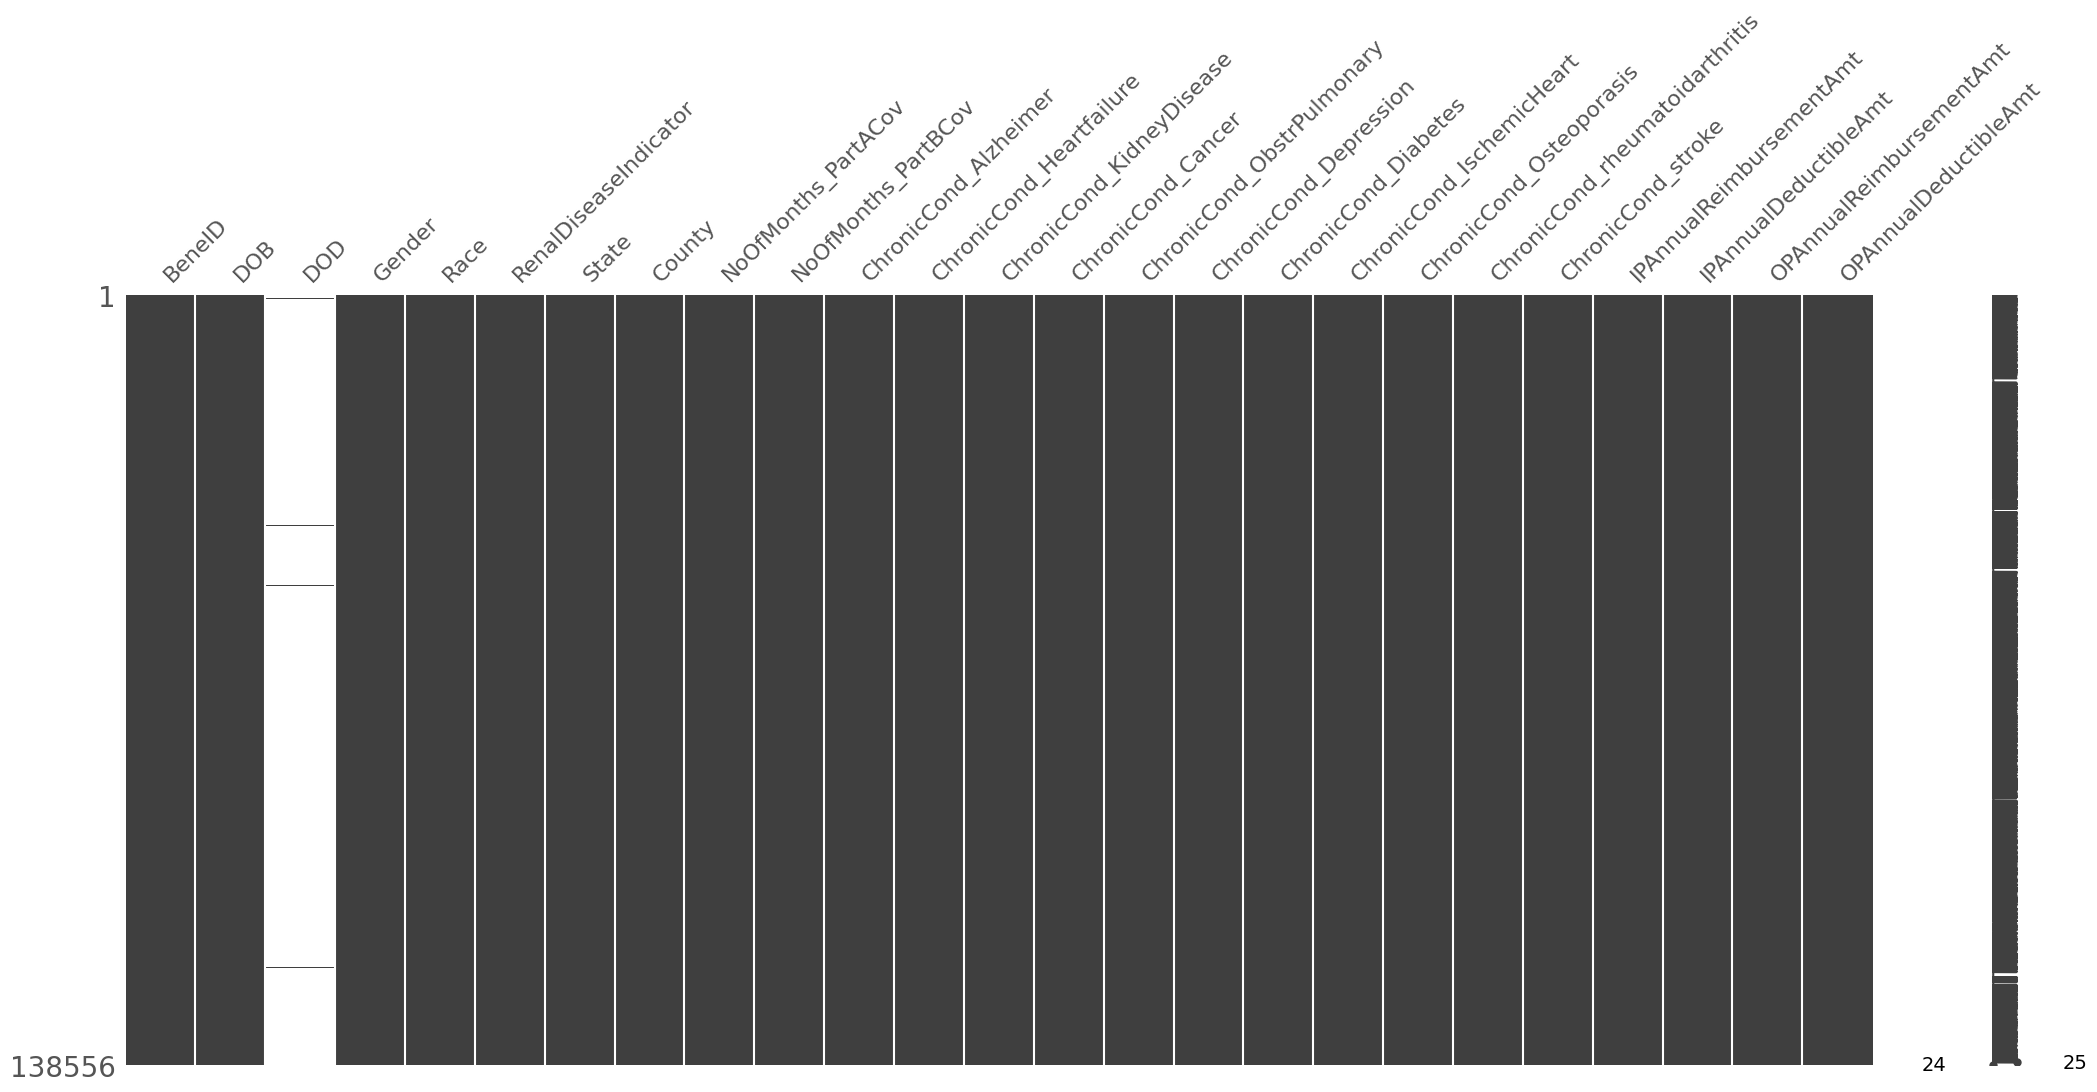

In [21]:
# Check missing data
msno.matrix(train_beneficiary)

<Axes: >

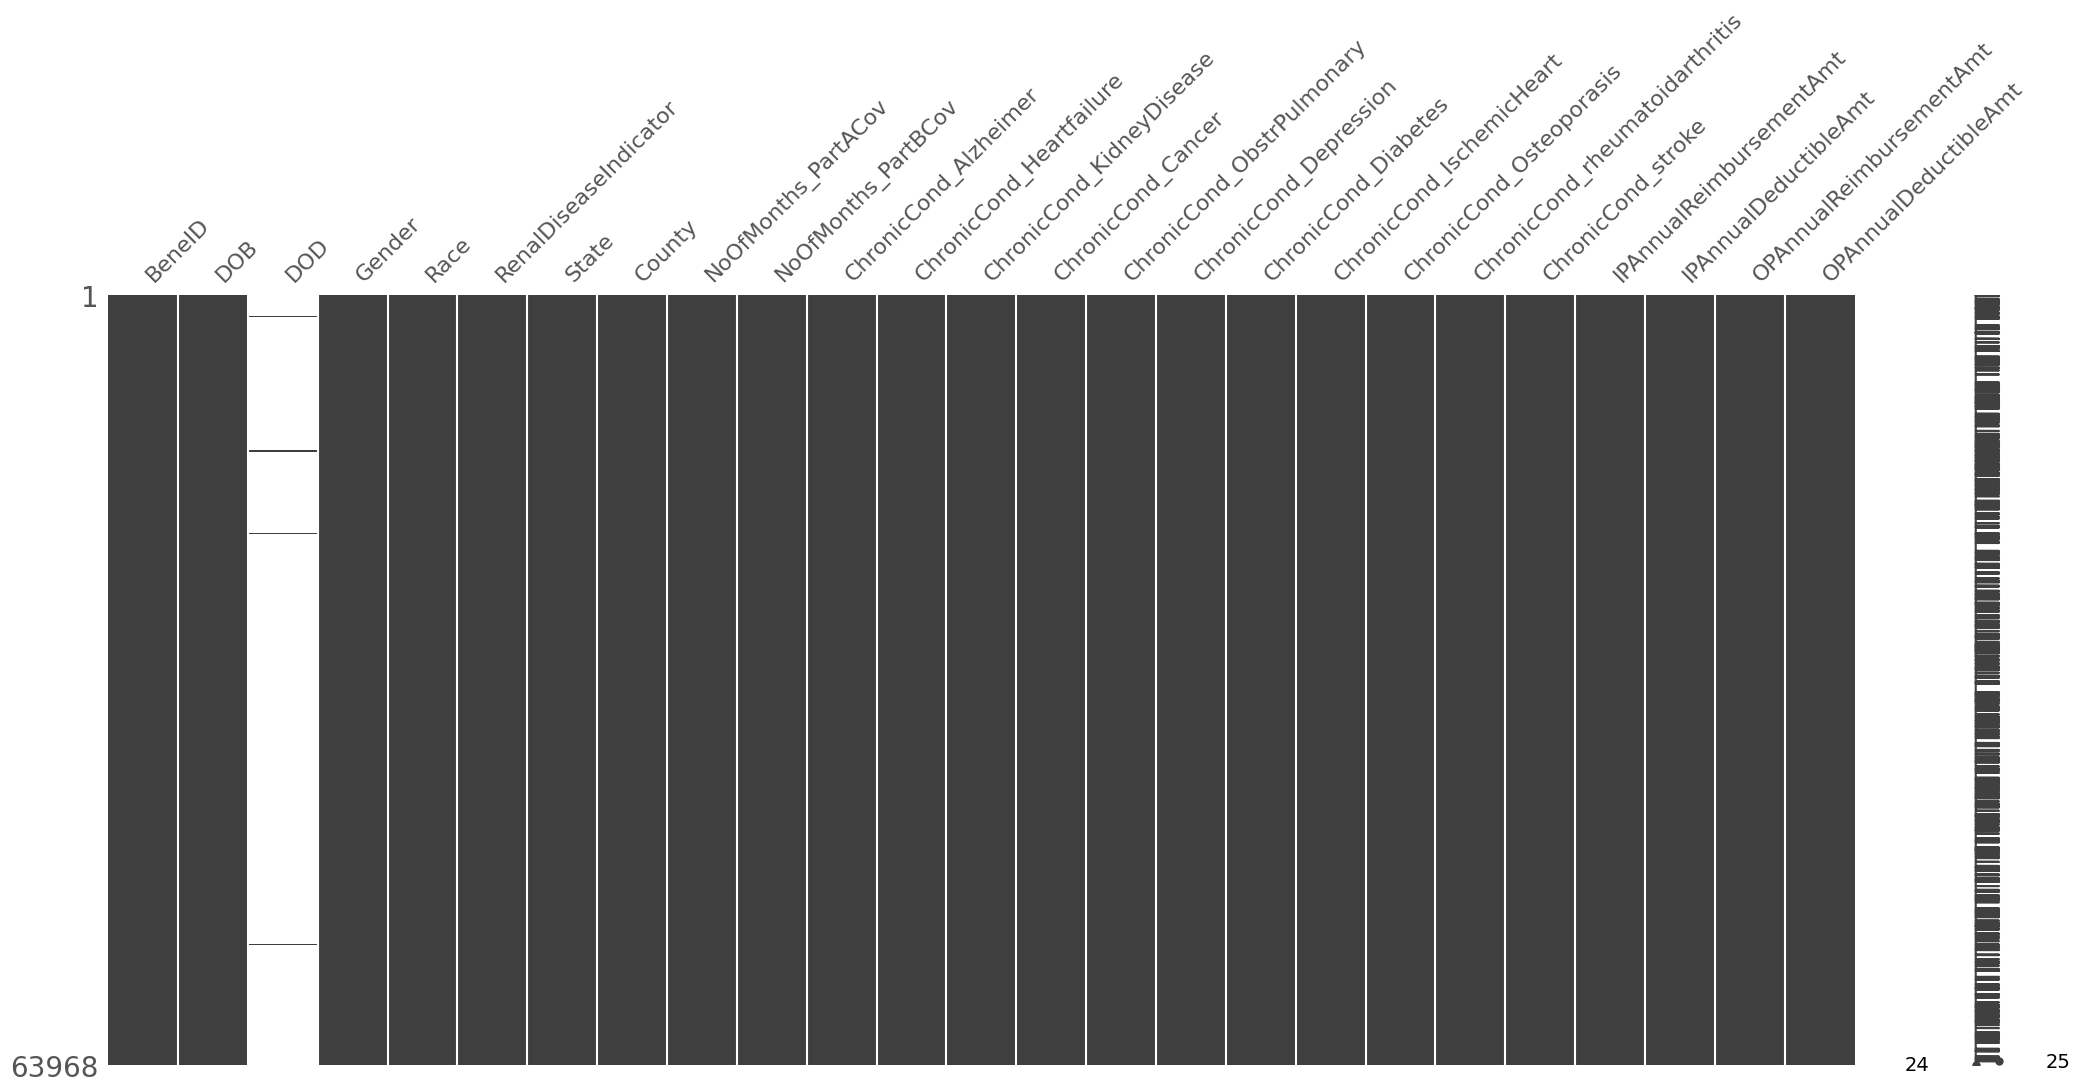

In [22]:
msno.matrix(test_beneficiary)

* #### Describe data

In [23]:
train_beneficiary.describe()


,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,1.762847,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [24]:
test_beneficiary.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000
mean,1.574053,1.250219,26.298681,368.597893,11.918850,11.928152,1.632566,1.457447,1.639101,1.862556,1.726097,1.607069,1.346767,1.282673,1.704055,1.717687,1.909533,4557.559561,497.287769,1664.710324,478.964154
std,0.494490,0.710366,14.954124,270.243676,0.967169,0.841754,0.482110,0.498190,0.480265,0.344318,0.445963,0.488405,0.475945,0.450302,0.456470,0.450128,0.286852,10741.954472,1095.432994,3010.045357,768.234011
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1000.000000,0.000000,-60.000000,0.000000
25%,1.000000,1.000000,12.000000,140.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,290.000000,70.000000
50%,2.000000,1.000000,26.000000,330.000000,12.000000,12.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,800.000000,230.000000
75%,2.000000,1.000000,39.000000,560.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5000.000000,1068.000000,1960.000000,590.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,155600.000000,38272.000000,97510.000000,13840.000000


#### Label Encoding

In [25]:
# Replacing 2 with 0 for chronic conditions ,that means chronic condition NO is 0 and YES is 1

train_beneficiary = train_beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

train_beneficiary = train_beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)
train_beneficiary = train_beneficiary.replace({'RenalDiseaseIndicator': '0'}, 0)

test_beneficiary = test_beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

test_beneficiary = test_beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)
test_beneficiary = test_beneficiary.replace({'RenalDiseaseIndicator': '0'}, 0)

In [26]:
# Replacing Gender label 2 with 0. Meaning 0 is Female and Male is kept as 1.
train_beneficiary = train_beneficiary.replace({'Gender': 2}, 0)
test_beneficiary = test_beneficiary.replace({'Gender': 2}, 0)

In [27]:
# Replacing Race label 5 with 0. Meaning 0 is Hispanic, 1 is White, 2 is Black, and 3 is Others
train_beneficiary = train_beneficiary.replace({'Race': 5}, 0)
test_beneficiary = test_beneficiary.replace({'Race': 5}, 0)

#### Create new variables for beneficiary dataset

* #### Create new feature for patient Age from DOB and DOD

In [28]:
# Change dtype for DOB and DOD to datetime and creating patient age variable

train_beneficiary['DOB'] = pd.to_datetime(train_beneficiary['DOB'] , format = '%Y-%m-%d')
train_beneficiary['DOD'] = pd.to_datetime(train_beneficiary['DOD'],format = '%Y-%m-%d',errors='ignore')
train_beneficiary['Age'] = round(((train_beneficiary['DOD'] - train_beneficiary['DOB']).dt.days)/365)


test_beneficiary['DOB'] = pd.to_datetime(test_beneficiary['DOB'] , format = '%Y-%m-%d')
test_beneficiary['DOD'] = pd.to_datetime(test_beneficiary['DOD'],format = '%Y-%m-%d',errors='ignore')
test_beneficiary['Age'] = round(((test_beneficiary['DOD'] - test_beneficiary['DOB']).dt.days)/365)

In [29]:
# Fill the age NA column with age calculated from the latest date.
# The last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.

train_beneficiary.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - train_beneficiary['DOB']).dt.days)/365),
                                 inplace=True)


test_beneficiary.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - test_beneficiary['DOB']).dt.days)/365),
                                 inplace=True)

* #### Create new feature for deceased patients

In [30]:
# Create a new variable 'Deceased' with label 1 meaning Dead and 0 Not Dead

train_beneficiary.loc[train_beneficiary.DOD.isna(),'Deceased']=0
train_beneficiary.loc[train_beneficiary.DOD.notna(),'Deceased']=1

test_beneficiary.loc[test_beneficiary.DOD.isna(),'Deceased']=0
test_beneficiary.loc[test_beneficiary.DOD.notna(),'Deceased']=1

* #### Create one column for reimbursement and deductible total amounts

In [31]:
train_beneficiary['Tot_Reimbursed_Amt'] = train_beneficiary['IPAnnualReimbursementAmt'] + train_beneficiary['OPAnnualReimbursementAmt']
train_beneficiary['Tot_Deductible_Amt'] = train_beneficiary['IPAnnualDeductibleAmt'] + train_beneficiary['OPAnnualDeductibleAmt'] 

test_beneficiary['Tot_Reimbursed_Amt'] = test_beneficiary['IPAnnualReimbursementAmt'] + test_beneficiary['OPAnnualReimbursementAmt']
test_beneficiary['Tot_Deductible_Amt'] = test_beneficiary['IPAnnualDeductibleAmt'] + test_beneficiary['OPAnnualDeductibleAmt'] 

* #### Break down DOB column into year, month, and day

In [32]:
# Breaking down date columns in to year, month, and day

train_beneficiary['DOB_year'] = train_beneficiary['DOB'].dt.year
train_beneficiary['DOB_month'] = train_beneficiary['DOB'].dt.month
train_beneficiary['DOB_day'] = train_beneficiary['DOB'].dt.day

test_beneficiary['DOB_year'] = test_beneficiary['DOB'].dt.year
test_beneficiary['DOB_month'] = test_beneficiary['DOB'].dt.month
test_beneficiary['DOB_day'] = test_beneficiary['DOB'].dt.day

In [33]:
# Check changes
train_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,0.0,36060,3274,1943,1,1
1,BENE11002,1936-09-01,NaT,0,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,73.0,0.0,30,50,1936,9,1
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40,73.0,0.0,90,40,1936,8,1
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,87.0,0.0,1810,760,1922,7,1
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,0,0,0,0,1,0,1,0,0,0,0,0,0,1790,1200,74.0,0.0,1790,1200,1935,9,1


In [34]:
train_beneficiary.describe()

,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Deceased,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day
count,138556,1421,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.0
mean,1936-04-30 16:46:00.772539520,2009-07-27 22:27:46.995073792,0.429068,1.149788,0.141300,25.666734,374.424745,11.907727,11.910145,0.332183,0.493678,0.312357,0.119959,0.237153,0.355524,0.601858,0.675857,0.274683,0.256820,0.079058,3660.346502,399.847296,1298.219348,377.718258,73.622831,0.010256,4958.565851,777.565555,1935.871337,6.520374,1.0
min,1909-01-01 00:00:00,2009-02-01 00:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8000.000000,0.000000,-70.000000,0.000000,26.000000,0.000000,-8000.000000,0.000000,1909.000000,1.000000,1.0
25%,1928-01-01 00:00:00,2009-06-01 00:00:00,0.000000,1.000000,0.000000,11.000000,141.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,170.000000,40.000000,68.000000,0.000000,270.000000,80.000000,1928.000000,4.000000,1.0
50%,1935-09-01 00:00:00,2009-08-01 00:00:00,0.000000,1.000000,0.000000,25.000000,340.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,570.000000,170.000000,74.000000,0.000000,1040.000000,320.000000,1935.000000,7.000000,1.0
75%,1941-12-01 00:00:00,2009-10-01 00:00:00,1.000000,1.000000,0.000000,39.000000,570.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2280.000000,1068.000000,1500.000000,460.000000,82.000000,0.000000,4690.000000,1128.000000,1941.000000,10.000000,1.0
max,1983-12-01 00:00:00,2009-12-01 00:00:00,1.000000,3.000000,1.000000,54.000000,999.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,161470.000000,38272.000000,102960.000000,13840.000000,101.000000,1.000000,262720.000000,40694.000000,1983.000000,12.000000,1.0
std,NaN,NaN,0.494945,0.492206,0.348332,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187,12.733335,0.100751,10236.889587,1211.359681,12.724354,3.452759,0.0


* #### Drop DOB, DOD and IP/OP reimbursement and deductible columns

In [35]:
# Drop these columns as we created other features that contain this information.
train_beneficiary.drop(['DOD','DOB','IPAnnualReimbursementAmt','OPAnnualReimbursementAmt',\
                      'IPAnnualDeductibleAmt','OPAnnualDeductibleAmt'], axis=1, inplace=True)\

test_beneficiary.drop(['DOD','DOB','IPAnnualReimbursementAmt','OPAnnualReimbursementAmt',\
                      'IPAnnualDeductibleAmt','OPAnnualDeductibleAmt'], axis=1, inplace=True)

#### Outliers

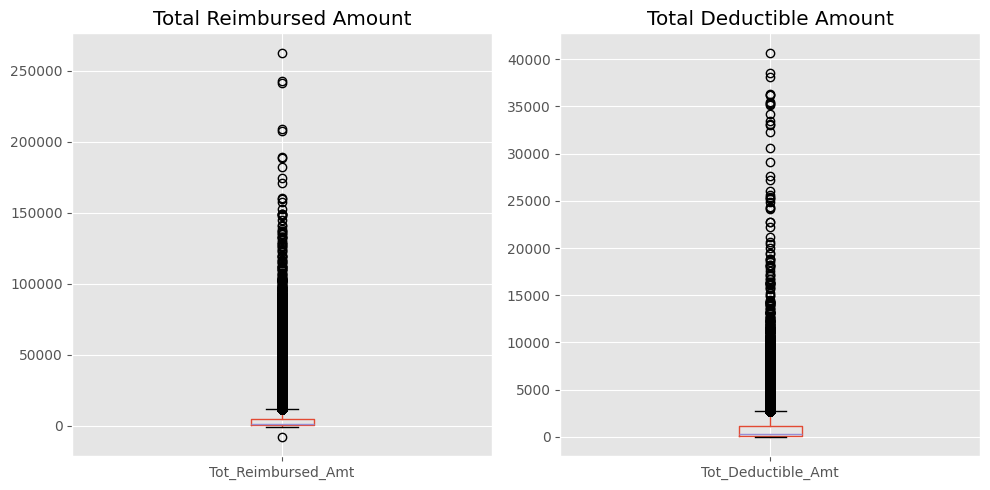

In [36]:
# Train data
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot the first boxplot on the first subplot
train_beneficiary[['Tot_Reimbursed_Amt']].boxplot(ax=axes[0])
axes[0].set_title('Total Reimbursed Amount')  

# Plot the second boxplot on the second subplot
train_beneficiary[['Tot_Deductible_Amt']].boxplot(ax=axes[1])
axes[1].set_title('Total Deductible Amount') 

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

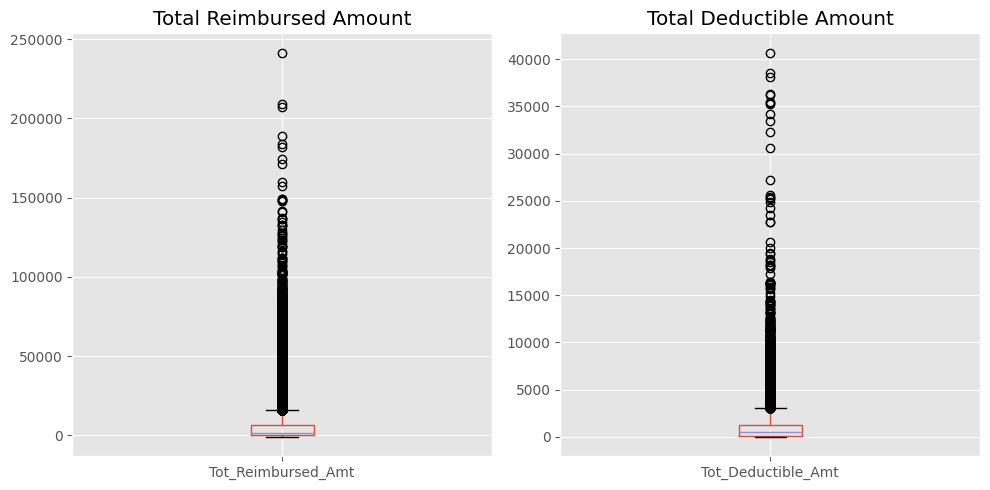

In [37]:
# Test data
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot the first boxplot on the first subplot
test_beneficiary[['Tot_Reimbursed_Amt']].boxplot(ax=axes[0])
axes[0].set_title('Total Reimbursed Amount')  

# Plot the second boxplot on the second subplot
test_beneficiary[['Tot_Deductible_Amt']].boxplot(ax=axes[1])
axes[1].set_title('Total Deductible Amount') 

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


#### Density Plots

Text(0.5, 0, '\n Reimbursement Amount (USD)')

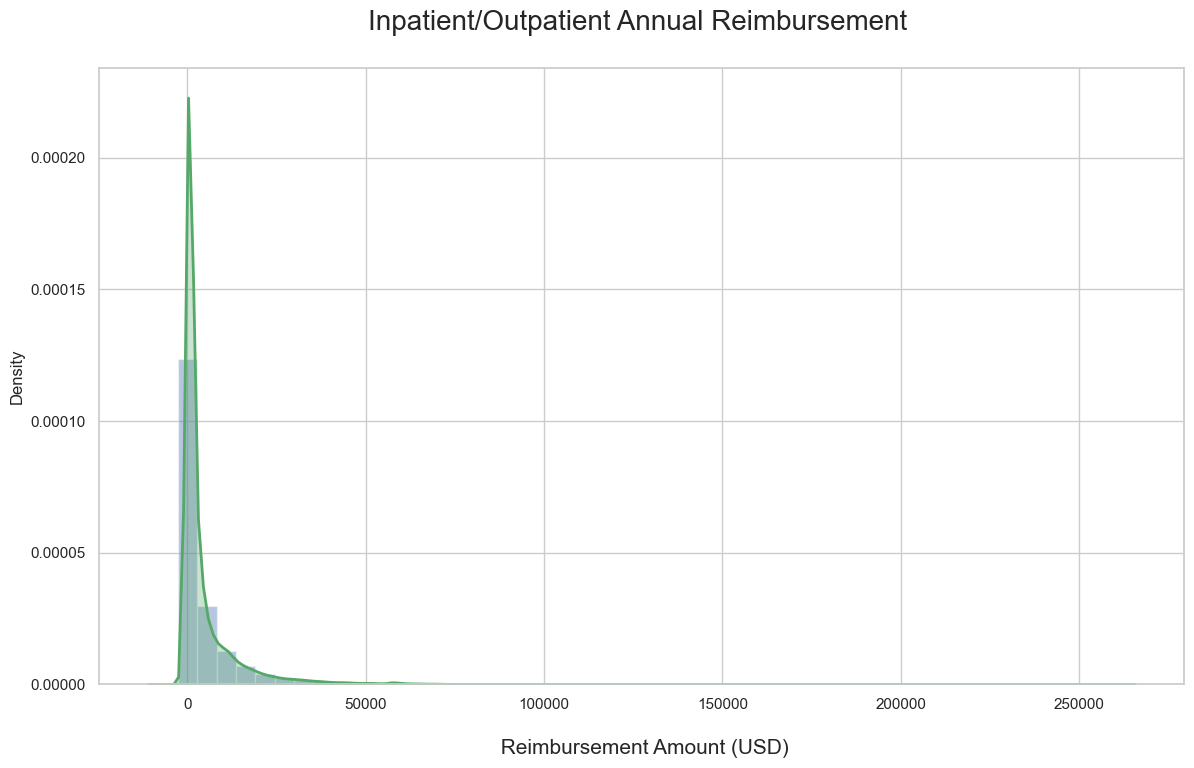

In [38]:
sns.set(rc={"figure.figsize":(14, 8)})
sns.set_theme(style='whitegrid')
sns.distplot(train_beneficiary["Tot_Reimbursed_Amt"],\
             kde=True, \
             kde_kws={"color": "g", "alpha": 0.3, "linewidth": 2, "shade": True})\
            .set_title("Inpatient/Outpatient Annual Reimbursement \n",fontsize = 20)
plt.xlabel("\n Reimbursement Amount (USD)", fontsize = 15)

Text(0.5, 0, '\n Deductible Amount (USD)')

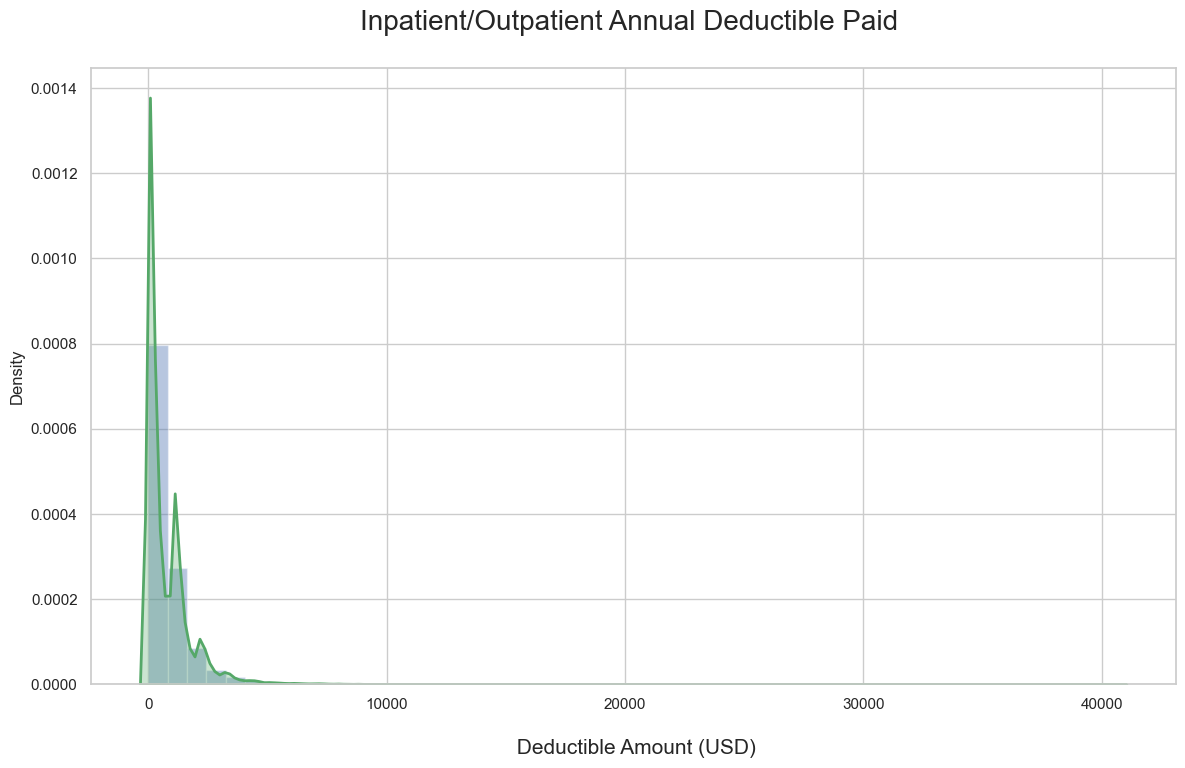

In [39]:
sns.set(rc={"figure.figsize":(14, 8)})
sns.set_theme(style='whitegrid')
sns.distplot(train_beneficiary["Tot_Deductible_Amt"],\
             kde=True, \
             kde_kws={"color": "g", "alpha": 0.3, "linewidth": 2, "shade": True})\
            .set_title("Inpatient/Outpatient Annual Deductible Paid \n",fontsize = 20)
plt.xlabel("\n Deductible Amount (USD)", fontsize = 15)

#### Some EDA

In [40]:
train_beneficiary.loc[train_beneficiary.Tot_Reimbursed_Amt > 150000,:]

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age,Deceased,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day
2500,BENE13669,1,2,0,34,730,12,12,0,1,0,0,0,0,0,1,0,0,0,69.0,0.0,242360,2024,1941,5,1
2849,BENE14036,0,2,0,33,770,12,12,0,1,1,0,1,1,1,1,0,1,0,92.0,0.0,152780,2946,1917,7,1
10411,BENE22137,1,1,1,10,510,12,12,1,1,1,1,1,1,1,1,1,0,0,83.0,0.0,159470,7710,1927,1,1
13375,BENE25318,1,1,0,5,370,12,12,0,1,0,0,0,0,0,1,0,0,1,71.0,0.0,188650,2544,1938,9,1
62365,BENE77765,0,1,0,17,550,12,12,0,0,1,1,1,0,0,1,0,0,0,90.0,0.0,188980,2265,1920,2,1
67669,BENE83465,0,1,1,4,490,12,12,0,1,1,0,0,1,1,1,0,0,0,56.0,0.0,171190,7756,1953,9,1
91564,BENE108968,0,1,0,34,400,12,12,0,1,0,1,1,1,1,1,1,0,0,82.0,0.0,208960,3072,1927,10,1
93621,BENE111157,0,2,0,1,360,12,12,0,1,0,0,1,1,1,1,0,0,0,61.0,0.0,241510,3281,1948,7,1
95013,BENE112649,1,1,1,38,250,12,12,1,1,1,0,1,0,1,1,0,0,1,70.0,0.0,174240,7286,1940,1,1
99998,BENE117983,1,1,1,33,420,12,12,1,1,1,0,1,0,1,1,1,1,1,84.0,0.0,157500,25280,1926,6,1


In [41]:
train_beneficiary.loc[train_beneficiary.Tot_Deductible_Amt > 30000,:]

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age,Deceased,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day
5643,BENE17030,1,1,1,10,340,12,12,0,1,1,1,1,1,1,1,1,0,0,95.0,0.0,44660,38552,1915,5,1
16307,BENE28463,0,1,0,10,120,12,12,1,1,1,0,1,1,1,1,1,1,1,68.0,0.0,3160,36336,1941,7,1
20791,BENE33269,0,1,0,10,120,12,12,1,1,1,0,1,1,1,1,1,0,0,71.0,0.0,15110,34224,1938,9,1
24715,BENE37461,0,1,0,31,300,12,12,0,1,1,1,0,0,1,1,0,0,0,66.0,0.0,68600,30636,1943,8,1
25404,BENE38197,1,1,1,6,200,12,12,0,1,1,0,1,0,1,1,0,1,0,67.0,0.0,6800,35208,1942,10,1
37948,BENE51674,0,1,0,22,130,12,12,1,0,1,0,1,0,0,1,0,0,0,86.0,0.0,19310,33158,1924,4,1
39108,BENE52900,0,1,1,39,560,12,12,1,1,1,0,1,0,1,1,0,0,0,72.0,0.0,64630,40694,1937,7,1
41069,BENE54982,0,2,0,33,420,12,12,1,1,1,1,1,1,0,1,0,0,0,100.0,0.0,9150,33428,1910,4,1
67574,BENE83361,1,2,0,34,820,12,12,1,1,0,0,0,1,1,0,0,0,0,71.0,0.0,33080,33068,1938,10,1
68953,BENE84825,1,1,0,11,960,12,12,0,1,0,0,0,1,1,0,0,0,0,78.0,0.0,270,35098,1932,1,1


Text(0.5, 1.0, 'Top 10 beneficiaries with high reimbursement amounts \n')

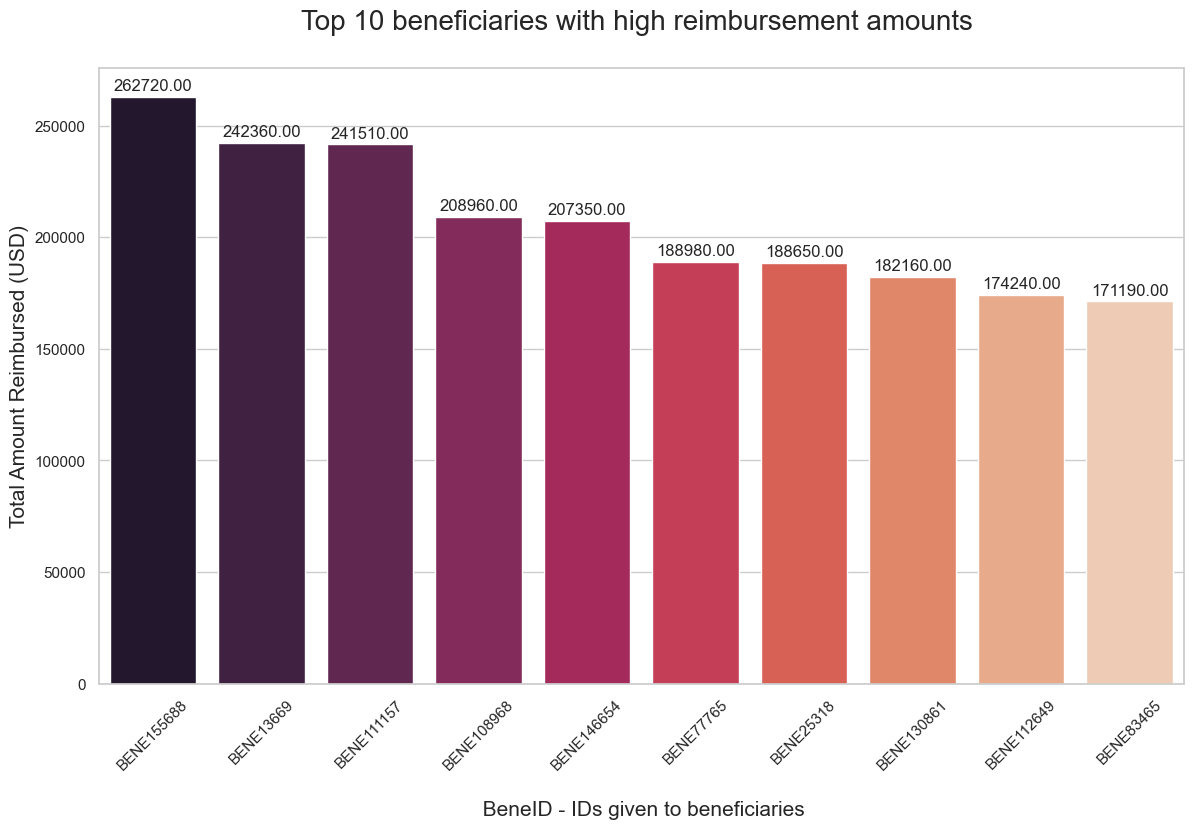

In [42]:
sns.set_theme(style='whitegrid')
my_order = train_beneficiary.groupby('BeneID')['Tot_Reimbursed_Amt']\
           .median().sort_values(ascending=False).head(10).index
plot = sns.barplot(data=train_beneficiary, x='BeneID', y='Tot_Reimbursed_Amt', order=my_order, palette='rocket')

# Annotate each bar with its value
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(rotation=45)
plt.xlabel("\n BeneID - IDs given to beneficiaries", fontsize = 15)
plt.ylabel("Total Amount Reimbursed (USD)", fontsize = 15)
plt.title("Top 10 beneficiaries with high reimbursement amounts \n", fontsize = 20)

Text(0.5, 1.0, 'Top 10 beneficiaries with highest deductible amounts paid \n')

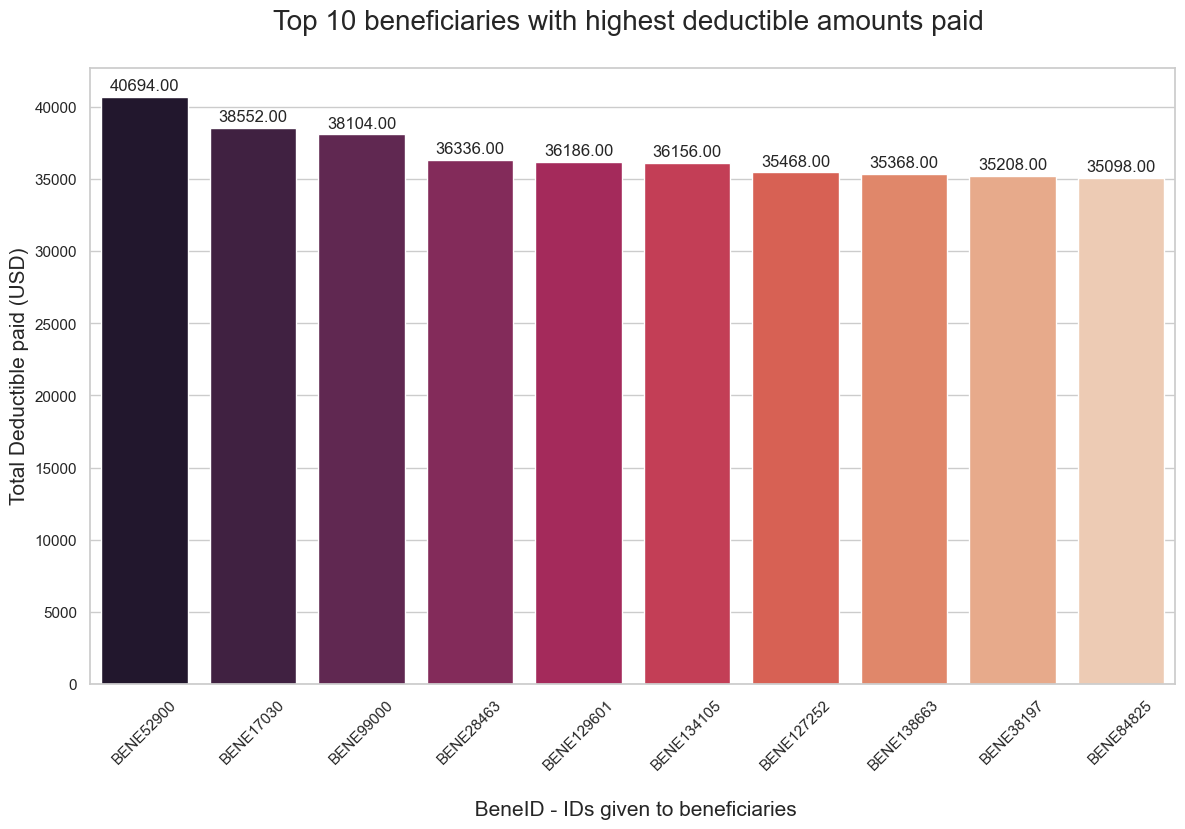

In [43]:
sns.set_theme(style='whitegrid')
my_order = train_beneficiary.groupby('BeneID')['Tot_Deductible_Amt']\
           .median().sort_values(ascending=False).head(10).index
plot = sns.barplot(data=train_beneficiary, x='BeneID', y='Tot_Deductible_Amt', order=my_order, palette='rocket')

# Annotate each bar with its value
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(rotation=45)
plt.xlabel("\n BeneID - IDs given to beneficiaries", fontsize = 15)
plt.ylabel("Total Deductible paid (USD)", fontsize = 15)
plt.title("Top 10 beneficiaries with highest deductible amounts paid \n", fontsize = 20)

---
## Explore Inpatient Datasets
---

In [44]:
train_inpatient.info()
test_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [45]:
print(train_inpatient.shape)
print(test_inpatient.shape)

(40474, 30)
(9551, 30)


* #### Outliers

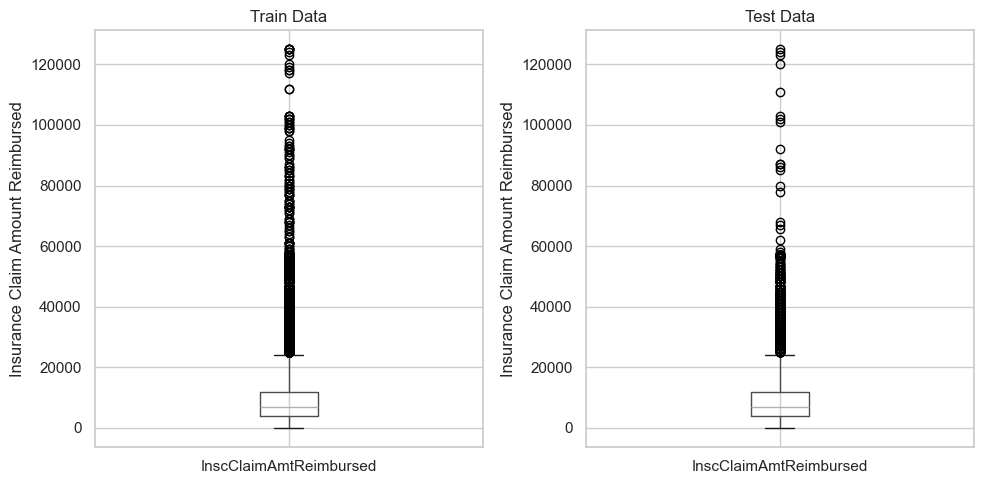

In [46]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first boxplot on the first subplot
train_inpatient[['InscClaimAmtReimbursed']].boxplot(ax=axes[0])
axes[0].set_title('Train Data')  
axes[0].set_ylabel('Insurance Claim Amount Reimbursed')  

# Plot the second boxplot on the second subplot
test_inpatient[['InscClaimAmtReimbursed']].boxplot(ax=axes[1])
axes[1].set_title('Test Data')  
axes[1].set_ylabel('Insurance Claim Amount Reimbursed')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

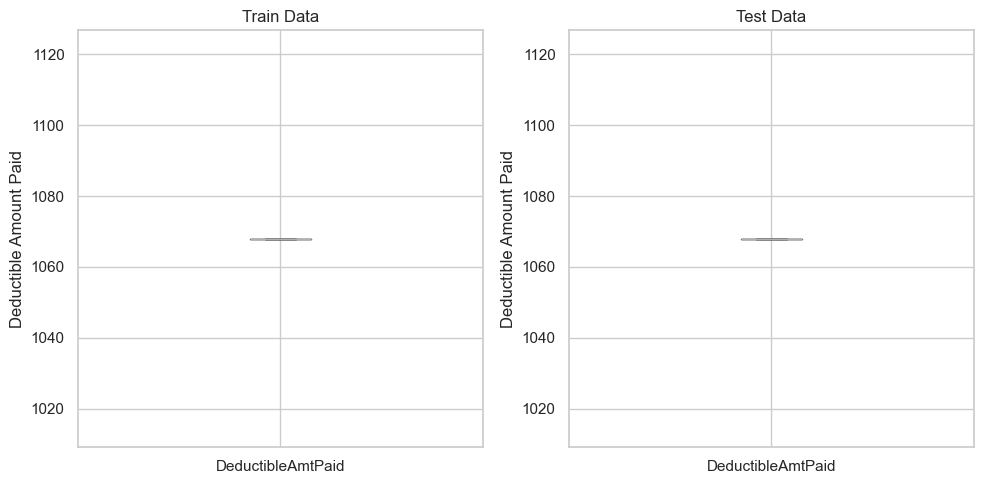

In [47]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

# Plot the first boxplot on the first subplot
train_inpatient[['DeductibleAmtPaid']].boxplot(ax=axes[0])
axes[0].set_title('Train Data')  
axes[0].set_ylabel('Deductible Amount Paid')  

# Plot the second boxplot on the second subplot
test_inpatient[['DeductibleAmtPaid']].boxplot(ax=axes[1])
axes[1].set_title('Test Data') 
axes[1].set_ylabel('Deductible Amount Paid') 

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

* #### Missing values

In [49]:
#Lets check missing values in each column in inpatient data
train_inpatient.isna().sum()
test_inpatient.isna().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

<Axes: >

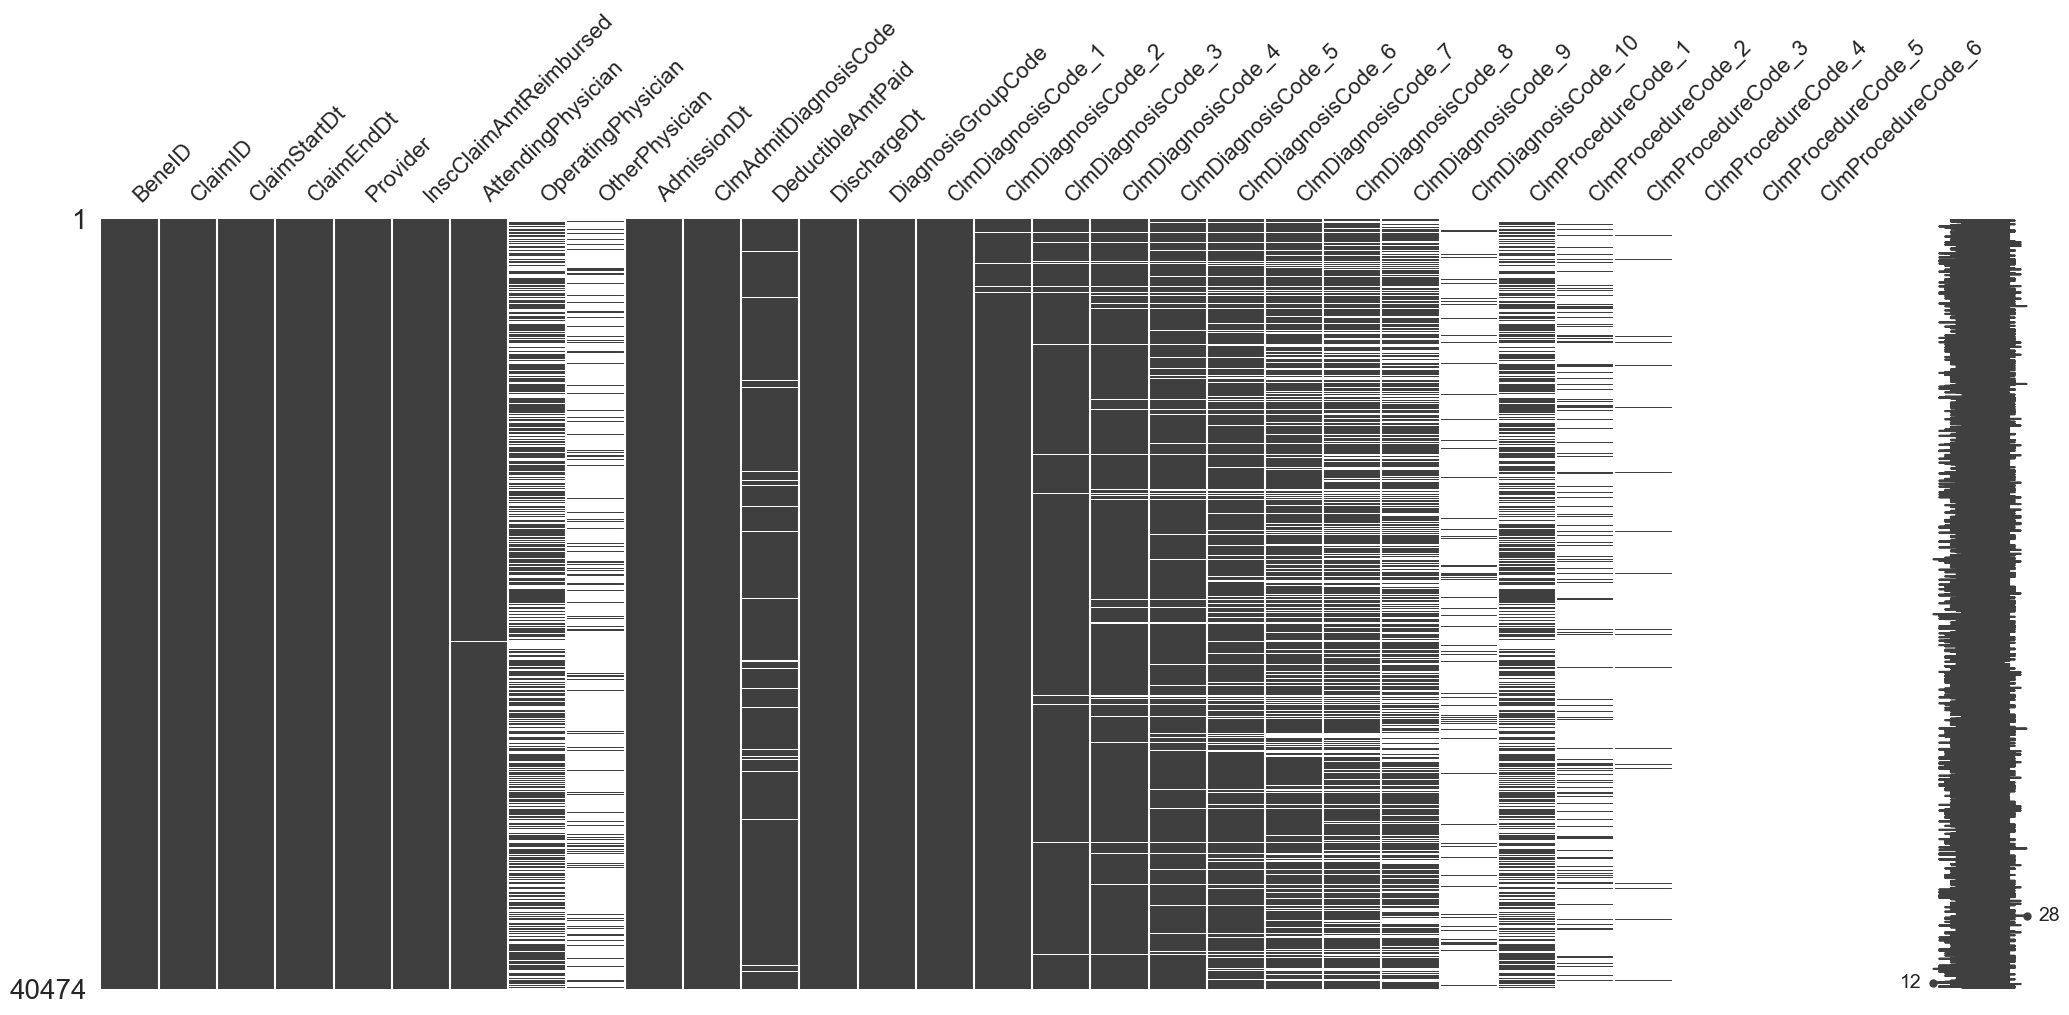

In [50]:
msno.matrix(train_inpatient)

<Axes: >

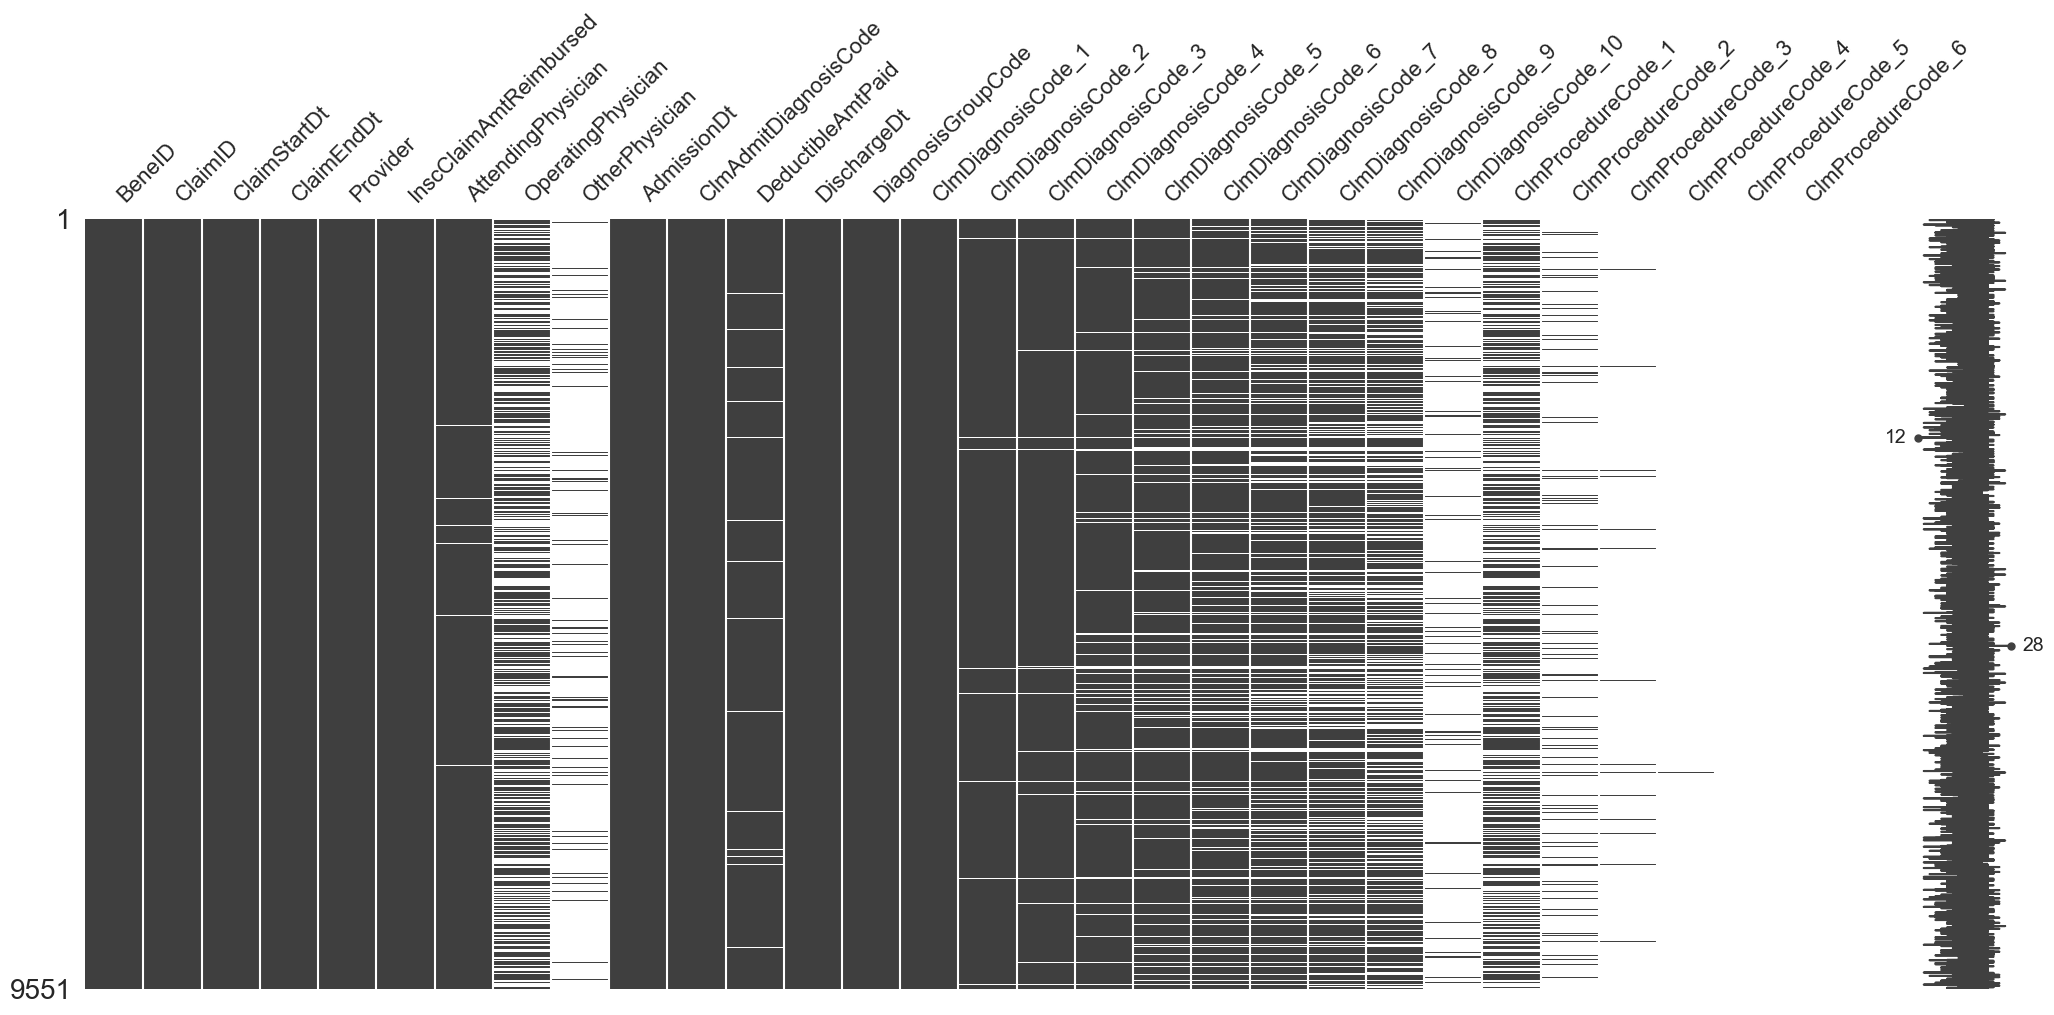

In [51]:
msno.matrix(test_inpatient)

* #### Handling missing values and imputing null values

In [52]:
# The columns ClmProcedureCode_4, ClmProcedureCode_5, and ClmProcedureCode_6 have high null vlaues. Therefore, we will drop those columns.

train_inpatient.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis=1, inplace=True)
test_inpatient.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis=1, inplace=True)

In [54]:
# Handle missing values is columns AttengingPhysician, OperatingPhysician, and OtherPhysician.
# For missing doctor code values, None is added as there was no doctor listed for that category.

columns_to_replace = ["AttendingPhysician", "OperatingPhysician", "OtherPhysician"]

train_inpatient[columns_to_replace] = train_inpatient[columns_to_replace].fillna("None")
test_inpatient[columns_to_replace] = test_inpatient[columns_to_replace].fillna("None")

In [55]:
# It was assumed that for missing deductible amounts, no deductible was paid.

train_inpatient['DeductibleAmtPaid'] = train_inpatient['DeductibleAmtPaid'].fillna(0)
test_inpatient['DeductibleAmtPaid'] = test_inpatient['DeductibleAmtPaid'].fillna(0)

In [56]:
# Where no codes were listed, None was used.
columns_to_replace = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
			   'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
			   'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
			   'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
			   'ClmProcedureCode_3','ClmAdmitDiagnosisCode']

train_inpatient[columns_to_replace] = train_inpatient[columns_to_replace].fillna("None")
test_inpatient[columns_to_replace] = test_inpatient[columns_to_replace].fillna("None")

In [57]:
# Check dataset after handling missing values.
train_inpatient.isnull().sum()

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
AdmissionDt               0
ClmAdmitDiagnosisCode     0
DeductibleAmtPaid         0
DischargeDt               0
DiagnosisGroupCode        0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
dtype: int64

* #### Adding two features that counts codes per provider

In [58]:
# Function that counts codes per provider.
def code_count(df):

	diag_cnt_df = df[['Provider','ClmDiagnosisCode_1','ClmDiagnosisCode_2',\
					  'ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5',\
					  'ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8',\
					  'ClmDiagnosisCode_9','ClmDiagnosisCode_10']].drop_duplicates()

	diag_cnt_df = diag_cnt_df.loc[diag_cnt_df.ClmDiagnosisCode_1 != 'None',:]\
							 .loc[diag_cnt_df.ClmDiagnosisCode_2 != 'None',:]\
							 .loc[diag_cnt_df.ClmDiagnosisCode_3 != 'None',:]\
							 .loc[diag_cnt_df.ClmDiagnosisCode_4 != 'None',:]\
							 .loc[diag_cnt_df.ClmDiagnosisCode_5 != 'None',:]\
							 .loc[diag_cnt_df.ClmDiagnosisCode_6 != 'None',:]\
							 .loc[diag_cnt_df.ClmDiagnosisCode_7 != 'None',:]\
							 .loc[diag_cnt_df.ClmDiagnosisCode_8 != 'None',:]\
							 .loc[diag_cnt_df.ClmDiagnosisCode_9 != 'None',:]\
							 .loc[diag_cnt_df.ClmDiagnosisCode_10 != 'None',:]


	diag_cnt_df = diag_cnt_df[['Provider','ClmDiagnosisCode_1','ClmDiagnosisCode_2',\
					  'ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5',\
					  'ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8',\
					  'ClmDiagnosisCode_9','ClmDiagnosisCode_10']].\
					   groupby('Provider').agg(['count']).reset_index()

	diag_cnt_df.columns=['Provider','CD1','CD2', 'CD3', 'CD4',\
						 'CD5','CD6','CD7', 'CD8', 'CD9','CD10']

	df['Diag_Code_Cnt'] = diag_cnt_df['CD1'] + diag_cnt_df['CD2'] + diag_cnt_df['CD3'] +\
						  diag_cnt_df['CD4'] + diag_cnt_df['CD5'] + diag_cnt_df['CD6'] +\
						  diag_cnt_df['CD7'] + diag_cnt_df['CD8'] + diag_cnt_df['CD9'] +\
						  diag_cnt_df['CD10']

	df['Diag_Code_Cnt'] = df['Diag_Code_Cnt'].fillna(0)
	df['Diag_Code_Cnt'] = df['Diag_Code_Cnt'].astype(int)
					  

	proc_cnt_df = df[['Provider','ClmProcedureCode_1', 'ClmProcedureCode_2','ClmProcedureCode_3']].\
					   drop_duplicates()
					   
	proc_cnt_df = proc_cnt_df.loc[proc_cnt_df.ClmProcedureCode_1 != 'None',:]\
							 .loc[proc_cnt_df.ClmProcedureCode_2 != 'None',:]\
							 .loc[proc_cnt_df.ClmProcedureCode_3 != 'None',:]\
		
	proc_cnt_df = proc_cnt_df[['Provider','ClmProcedureCode_1', 'ClmProcedureCode_2','ClmProcedureCode_3']].\
					   groupby('Provider').agg(['count']).reset_index()

	proc_cnt_df.columns=['Provider','CD1','CD2','CD3']

	df['Proc_Code_Cnt'] = proc_cnt_df['CD1'] + proc_cnt_df['CD2'] + proc_cnt_df['CD3']

	df['Proc_Code_Cnt'] = df['Proc_Code_Cnt'].fillna(0)
	df['Proc_Code_Cnt'] = df['Proc_Code_Cnt'].astype(int)

In [59]:
code_count(train_inpatient)
code_count(test_inpatient)

In [60]:
train_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Diag_Code_Cnt,Proc_Code_Cnt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,None,None,None,None,40,3
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,None,None,None,None,None,None,None,7092.0,None,None,30,3
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,None,None,None,None,None,None,None,10,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,None,331.0,None,None,80,3
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,None,3893.0,None,None,60,6


---
## Explore Outpatient Dataset
---

In [61]:
train_outpatient.info()
test_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [62]:
# Print shape of oupatients datasets
print(train_outpatient.shape)
print(test_outpatient.shape)

(517737, 27)
(125841, 27)


* #### Check missing values

In [63]:
# Check missing values on each column in outpatient data
train_outpatient.isna().sum()

test_outpatient.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

<Axes: >

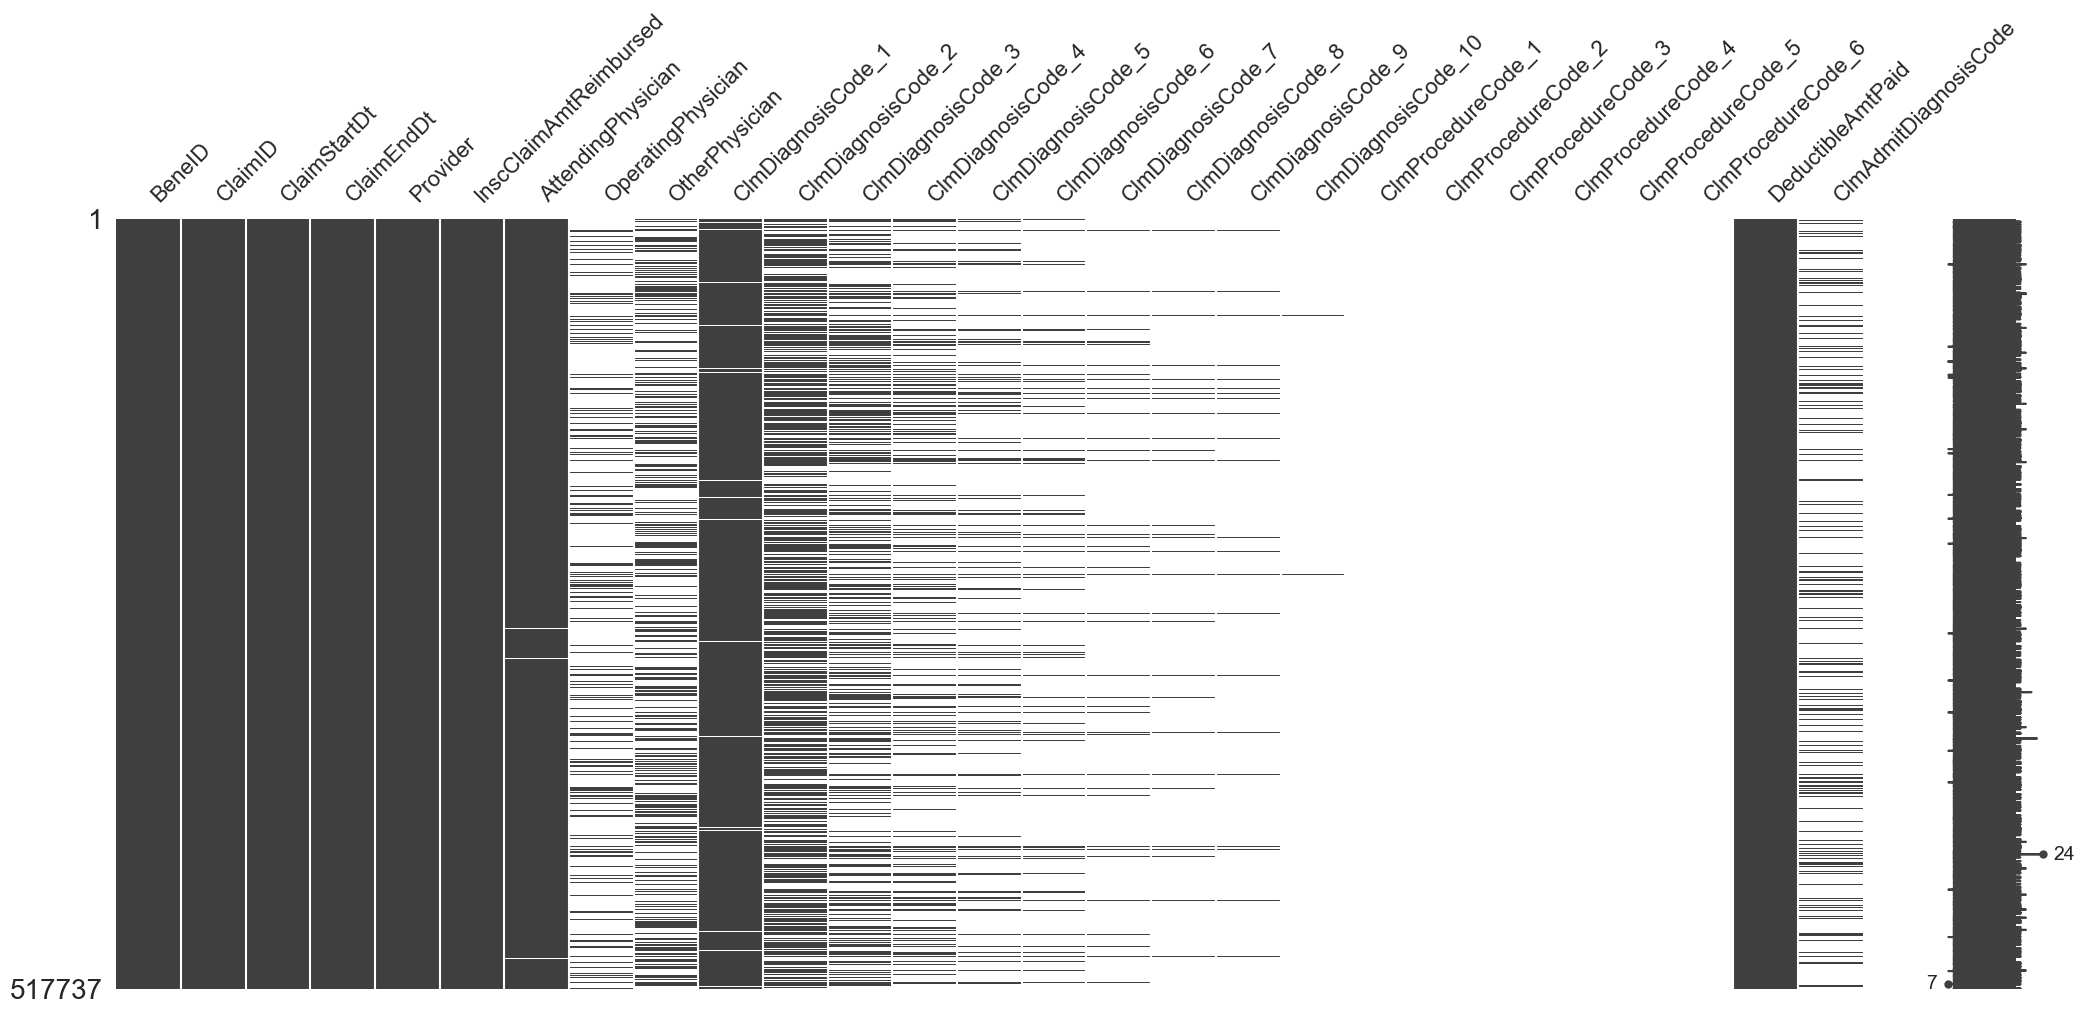

In [64]:
msno.matrix(train_outpatient)

<Axes: >

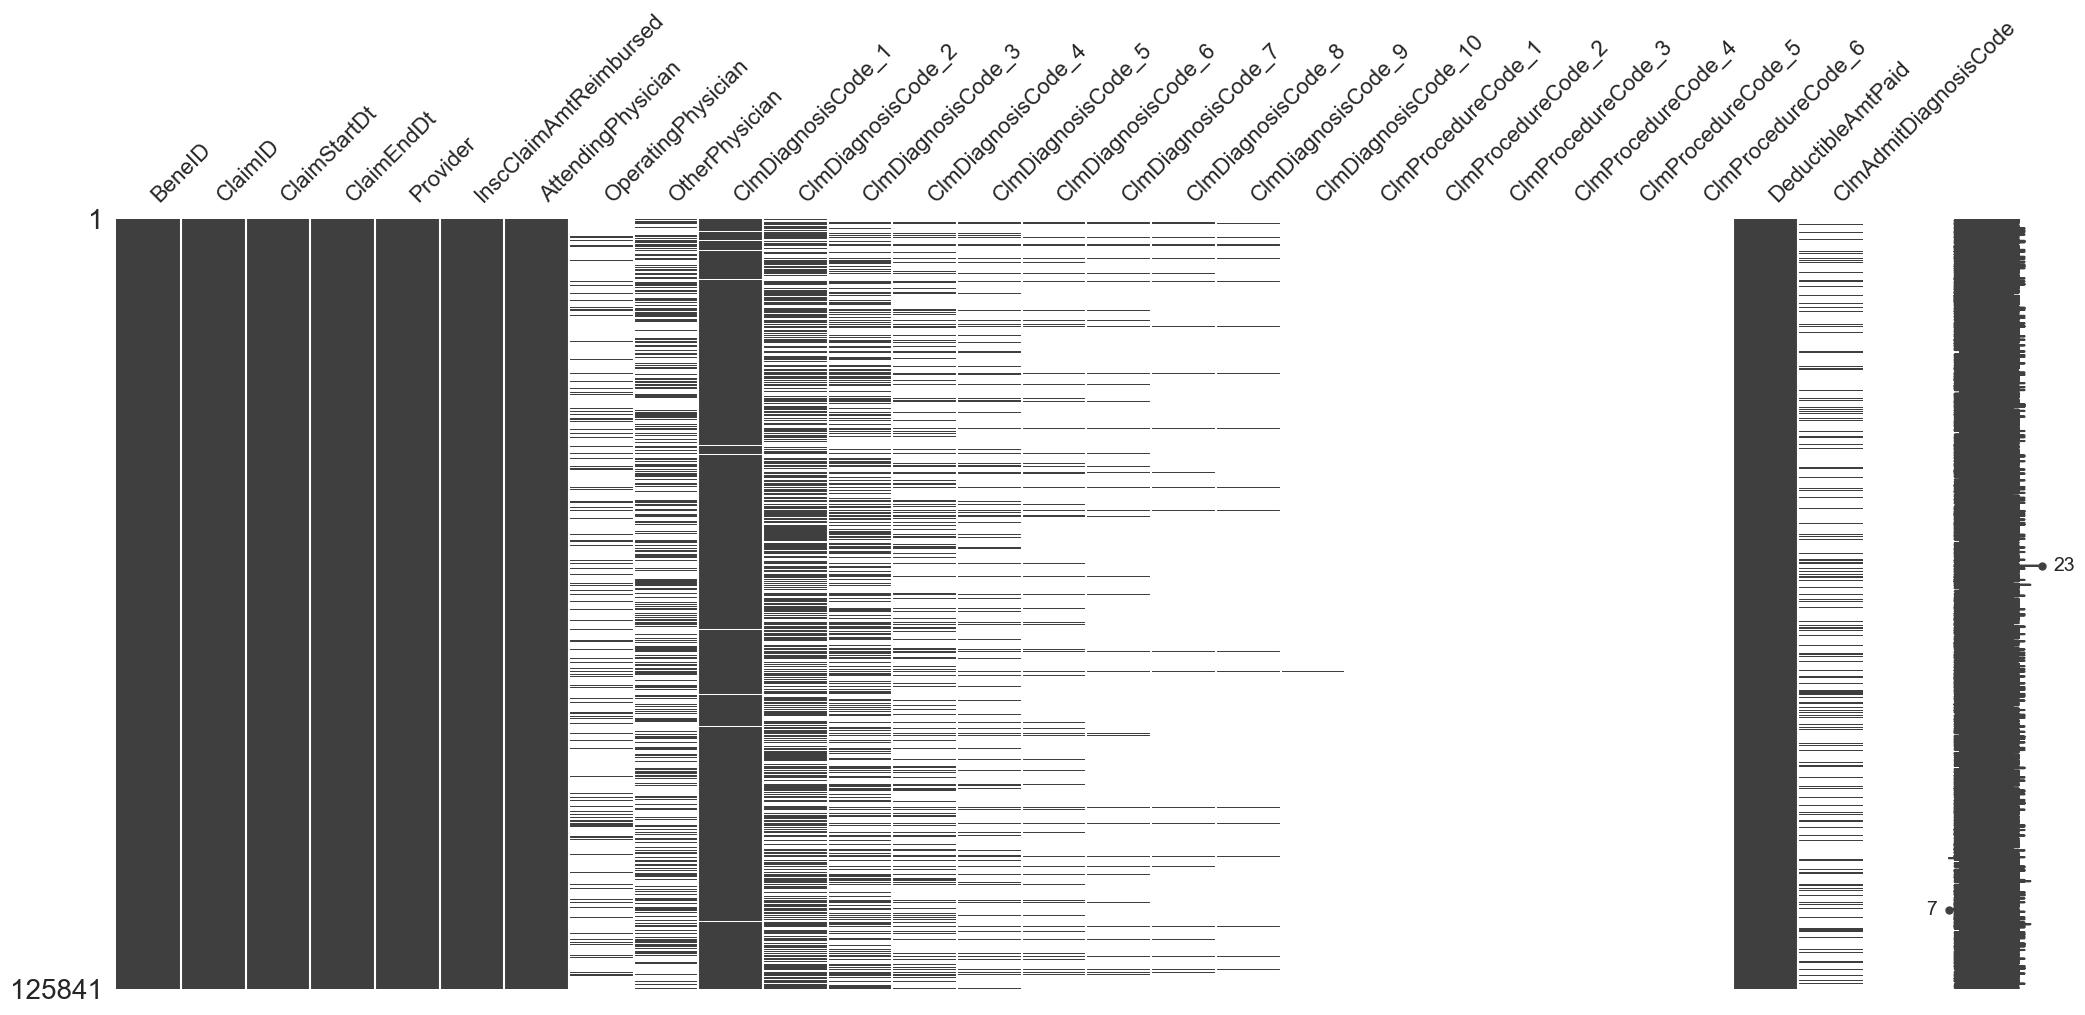

In [65]:
msno.matrix(test_outpatient)

* #### Handling missing values and imputing null values

In [66]:
# The columns ClmProcedureCode_4, ClmProcedureCode_5, and ClmProcedureCode_6 have high null vlaues. Therefore, we will drop those columns.

train_outpatient.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis=1, inplace=True)
test_outpatient.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis=1, inplace=True)

In [67]:
# Handle missing values is columns AttengingPhysician, OperatingPhysician, and OtherPhysician.
# For missing doctor code values, None is added as there was no doctor listed for that category.

columns_to_replace = ["AttendingPhysician", "OperatingPhysician", "OtherPhysician"]

train_outpatient[columns_to_replace] = train_outpatient[columns_to_replace].fillna("None")
test_outpatient[columns_to_replace] = test_outpatient[columns_to_replace].fillna("None")

In [68]:
# It was assumed that for missing deductible amounts, no deductible was paid.

train_outpatient['DeductibleAmtPaid'] = train_outpatient['DeductibleAmtPaid'].fillna(0)
test_outpatient['DeductibleAmtPaid'] = test_outpatient['DeductibleAmtPaid'].fillna(0)

In [69]:
# Where no codes were listed, None was used.
columns_to_replace = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
			   'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
			   'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
			   'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
			   'ClmProcedureCode_3','ClmAdmitDiagnosisCode']

train_outpatient[columns_to_replace] = train_outpatient[columns_to_replace].fillna("None")
test_outpatient[columns_to_replace] = test_outpatient[columns_to_replace].fillna("None")

In [70]:
# Check dataset after handling missing values.
train_outpatient.isnull().sum()

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
DeductibleAmtPaid         0
ClmAdmitDiagnosisCode     0
dtype: int64

* #### Adding two features that counts codes per provider

In [71]:
code_count(train_outpatient)
code_count(test_outpatient)

In [72]:
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Diag_Code_Cnt,Proc_Code_Cnt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,V5866,V1272,None,None,None,None,None,None,None,None,None,None,0,56409,10,3
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,None,None,None,None,None,None,None,None,None,None,None,None,0,79380,10,3
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,None,None,None,None,None,None,None,None,None,None,None,None,0,None,10,3
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,None,None,None,None,None,None,None,None,None,None,None,None,0,None,10,3
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,30000,72887,4280,7197,V4577,None,None,None,None,None,None,None,0,71947,10,0


* #### Outliers

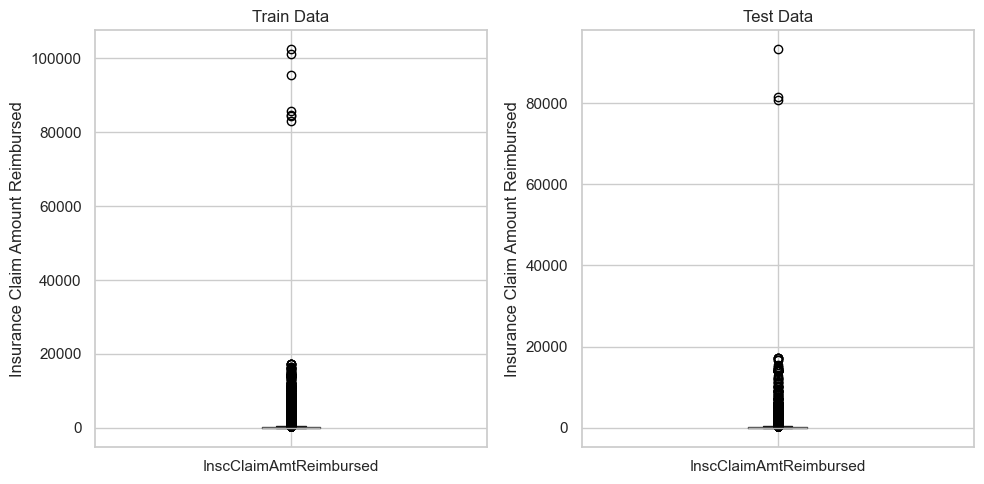

In [73]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first boxplot on the first subplot
train_outpatient[['InscClaimAmtReimbursed']].boxplot(ax=axes[0])
axes[0].set_title('Train Data')  
axes[0].set_ylabel('Insurance Claim Amount Reimbursed')  

# Plot the second boxplot on the second subplot
test_outpatient[['InscClaimAmtReimbursed']].boxplot(ax=axes[1])
axes[1].set_title('Test Data')  
axes[1].set_ylabel('Insurance Claim Amount Reimbursed')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

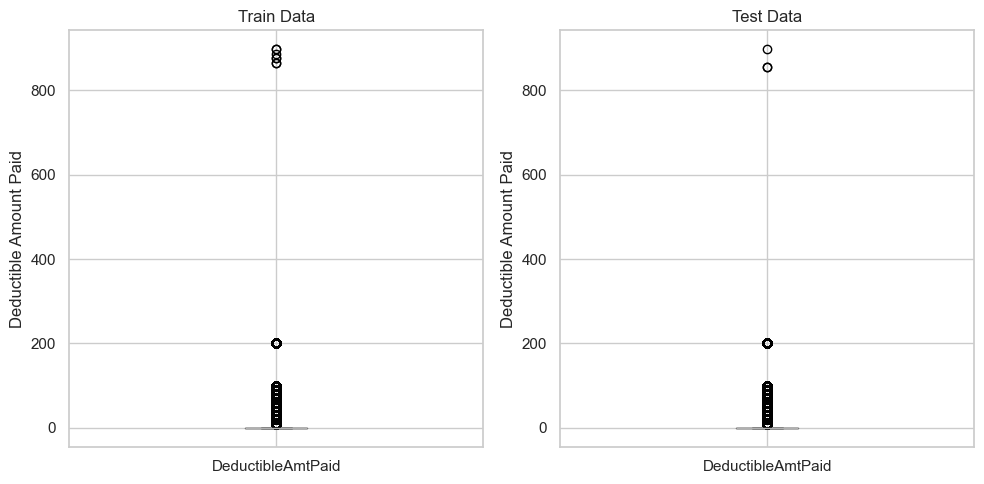

In [74]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

# Plot the first boxplot on the first subplot
train_outpatient[['DeductibleAmtPaid']].boxplot(ax=axes[0])
axes[0].set_title('Train Data')  
axes[0].set_ylabel('Deductible Amount Paid')  

# Plot the second boxplot on the second subplot
test_outpatient[['DeductibleAmtPaid']].boxplot(ax=axes[1])
axes[1].set_title('Test Data') 
axes[1].set_ylabel('Deductible Amount Paid') 

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

---
## Creating our final datasets
---

In [75]:
# Making df of interest. Inpatient df

inp_df = train_inpatient[['BeneID','Provider','ClaimID','AttendingPhysician','ClmAdmitDiagnosisCode',\
                 'DiagnosisGroupCode','ClmDiagnosisCode_1','ClmProcedureCode_1','InscClaimAmtReimbursed']]

# Adding fraud labels

inp_df = inp_df.merge(train_y, on='Provider')

# Narrowing down:

inp_df = inp_df.loc[inp_df.PotentialFraud == 'Yes',:]
inp_df = inp_df.loc[inp_df.InscClaimAmtReimbursed > 80000,:]

In [76]:
# Count Duplicates
print(inp_df['BeneID'].duplicated().sum())
print(inp_df['AttendingPhysician'].duplicated().sum())
print(inp_df['ClmAdmitDiagnosisCode'].duplicated().sum())
print(inp_df['DiagnosisGroupCode'].duplicated().sum())
print(inp_df['ClmDiagnosisCode_1'].duplicated().sum())
print(inp_df['ClmProcedureCode_1'].duplicated().sum())

0
0
8
3
10
11


In [77]:
# Making df of interest. Outpatient df.

out_df = train_outpatient[['BeneID','Provider','ClaimID','AttendingPhysician','ClmAdmitDiagnosisCode',\
                           'ClmDiagnosisCode_1','ClmProcedureCode_1','InscClaimAmtReimbursed']]

# Adding fraud labels

out_df = out_df.merge(train_y, on='Provider')

# Narrowing down:

out_df = out_df.loc[out_df.PotentialFraud == 'Yes',:]
out_df = out_df.loc[out_df.InscClaimAmtReimbursed > 80000,:]

In [78]:
# Count Duplicates	
print(out_df['BeneID'].duplicated().sum())
print(out_df['AttendingPhysician'].duplicated().sum())
print(out_df['ClmAdmitDiagnosisCode'].duplicated().sum())
print(out_df['ClmDiagnosisCode_1'].duplicated().sum())
print(out_df['ClmProcedureCode_1'].duplicated().sum())

0
0
1
0
0


* #### Creating new features for inpatient/outpatient datasets

- Created Hospital Stay in days feature for each claim from AdmissionDt and DischargeDt
- Created Claim duration in days feature from ClaimStartDt and ClaimEndDt
- Created a feature listing the month and year the beneficiary made claim
- Added a feature calculating insurance covered percentages for each claim
- Added a feature calculating total claim amount
- Count features: Physician Count (for each patient), Provider Count (for each patient) and Claims Count (for each patient)

In [79]:
def in_new_feats(df):

	# Changing dtype for claim start/end and admission/discharge date
	# Columns to datetime

	df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'])
	df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'])
	df['AdmissionDt'] = pd.to_datetime(df['AdmissionDt'])
	df['DischargeDt'] = pd.to_datetime(df['DischargeDt'])

	# Creating Hospital Stay and Claim_Duration features. New column -> Hospital Stay, Claim Duration
	# dtype to int

	df['Hospital_Stay'] = round(((df['DischargeDt'] - df['AdmissionDt']).dt.days)) 
	df['Claim_Duration'] = round(((df['ClaimEndDt'] - df['ClaimStartDt']).dt.days))
	df['Hospital_Stay'] = df['Hospital_Stay'].astype(int)
	df['Claim_Duration'] = df['Claim_Duration'].astype(int)

	# Breaking down claim made by month and year. New columns -> Claim Start Year, Claim Start Month

	df['Claim_Start_Year'] = df['ClaimStartDt'].dt.year
	df['Claim_Start_Month'] = df['ClaimStartDt'].dt.month

	# Get Insurance covered percentages. New column -> Insurance Covered Per

	df['Insurance_Covered_Per'] = round((df['InscClaimAmtReimbursed']/\
										(df['InscClaimAmtReimbursed']+\
										 df['DeductibleAmtPaid']))*100, 2)
	df['Insurance_Covered_Per'] = df['Insurance_Covered_Per'].fillna(0)

	# Add the insurance claim amount reimbursed + Deductible amount paid. New Column -> Total Claim Amount

	df['Total_Claim_Amt'] = (df['InscClaimAmtReimbursed']+df['DeductibleAmtPaid'])

	# Count of total number of physicians for each beneficiary. New Column -> Physician Count

	phy_df = df[['BeneID','AttendingPhysician','OperatingPhysician','OtherPhysician']]\
			  .drop_duplicates()

	phy_df = phy_df.loc[phy_df.AttendingPhysician != 'None',:]\
				   .loc[phy_df.OperatingPhysician != 'None',:]\
				   .loc[phy_df.OtherPhysician != 'None',:]	

	phy_df = phy_df[['BeneID','AttendingPhysician','OperatingPhysician','OtherPhysician']]\
			  .groupby('BeneID').agg(['count']).reset_index()

	phy_df.columns=['Bene_ID','Att_cnt', 'Op_cnt', 'Othr_cnt']

	df['Physician_Count'] = phy_df['Att_cnt'] + phy_df['Op_cnt'] + phy_df['Othr_cnt']
	df['Physician_Count'] = df['Physician_Count'].fillna(0)
	df['Physician_Count'] = df['Physician_Count'].astype(int)

	# Count of claims associated with each beneficiary. New colum -> Claim Count

	cl_df = df[['BeneID','ClaimID']].groupby('BeneID').agg(['count']).reset_index()
	cl_df.columns=['Bene_ID','Cl_cnt']

	df['Claim_Count'] = cl_df['Cl_cnt']
	df['Claim_Count'] = df['Claim_Count'].fillna(0)
	df['Claim_Count'] = df['Claim_Count'].astype(int)

	# Count of hospitals associated with each beneficiary. New column -> Hospital Count
	
	prv_df = df[['BeneID','Provider']].drop_duplicates()   
	prv_df = prv_df[['BeneID','Provider']].groupby('BeneID')\
				 .agg(['count']).reset_index()

	prv_df.columns=['Bene_ID','Prov_cnt']

	df['Hospital_Count'] = prv_df['Prov_cnt']
	df['Hospital_Count'] = df['Hospital_Count'].fillna(0)    
	df['Hospital_Count'] = df['Hospital_Count'].astype(int)  


In [80]:
# Apply in_new_feats to inpatient datasets.
in_new_feats(train_inpatient)
in_new_feats(test_inpatient)

In [81]:
def out_new_feats(df):

	# Changing dtype for claim start/end and admission/discharge date
	# columns to datetime

	df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'])
	df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'])

	# Creating Claim_Duration features. New column -> Claim Duration
	# Change dtype to int

	df['Claim_Duration'] = round(((df['ClaimEndDt'] - df['ClaimStartDt']).dt.days))
	df['Claim_Duration'] = df['Claim_Duration'].astype(int)

	# Breaking down claim made by month and year. New columns -> Claim Start Year, Claim Start Month

	df['Claim_Start_Year'] = df['ClaimStartDt'].dt.year
	df['Claim_Start_Month'] = df['ClaimStartDt'].dt.month

	# Get Insurance covered percentages. New column -> Insurance Covered Per

	df['Insurance_Covered_Per'] = round((df['InscClaimAmtReimbursed']/\
										(df['InscClaimAmtReimbursed']+\
										 df['DeductibleAmtPaid']))*100, 2)

	df['Insurance_Covered_Per'] = df['Insurance_Covered_Per'].fillna(0)

	# Add the insurance claim amount reimbursed + Deductible amount paid. New Column -> Total Claim Amount

	df['Total_Claim_Amt'] = (df['InscClaimAmtReimbursed']+df['DeductibleAmtPaid'])

	# Count of total number of physicians for each beneficiary. New Column -> Physician Count

	phy_df = df[['BeneID','AttendingPhysician','OperatingPhysician','OtherPhysician']]\
			  .drop_duplicates()

	phy_df = phy_df.loc[phy_df.AttendingPhysician != 'None',:]\
				   .loc[phy_df.OperatingPhysician != 'None',:]\
				   .loc[phy_df.OtherPhysician != 'None',:]

	phy_df = phy_df[['BeneID','AttendingPhysician','OperatingPhysician','OtherPhysician']]\
			  .groupby('BeneID').agg(['count']).reset_index()

	phy_df.columns=['Bene_ID','Att_cnt', 'Op_cnt', 'Othr_cnt']

	df['Physician_Count'] = phy_df['Att_cnt'] + phy_df['Op_cnt'] + phy_df['Othr_cnt']
	df['Physician_Count'] = df['Physician_Count'].fillna(0)
	df['Physician_Count'] = df['Physician_Count'].astype(int)

	# Count of claims associated with each beneficiary. New colum -> Claim Count

	cl_df = df[['BeneID','ClaimID']].groupby('BeneID').agg(['count']).reset_index()
	cl_df.columns=['Bene_ID','Cl_cnt']

	df['Claim_Count'] = cl_df['Cl_cnt']
	df['Claim_Count'] = df['Claim_Count'].fillna(0)
	df['Claim_Count'] = df['Claim_Count'].astype(int)

	# Count of hospitals associated with each beneficiary. New column -> Hospital Count
	
	prv_df = df[['BeneID','Provider']].drop_duplicates()
	prv_df = prv_df[['BeneID','Provider']].groupby('BeneID')\
				 .agg(['count']).reset_index()

	prv_df.columns=['Bene_ID','Prov_cnt']

	df['Hospital_Count'] = prv_df['Prov_cnt']
	df['Hospital_Count'] = df['Hospital_Count'].fillna(0)
	df['Hospital_Count'] = df['Hospital_Count'].astype(int)

In [82]:
# Apply out_new_feats to outpatient datasets
out_new_feats(train_outpatient)
out_new_feats(test_outpatient)

- Dropping ClaimStartDt, ClaimEndDt, AdmissionDt and DischargeDt columns

In [83]:
train_inpatient.drop(['ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt'], axis=1, inplace=True)\

test_inpatient.drop(['ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt'], axis=1, inplace=True)

train_outpatient.drop(['ClaimStartDt','ClaimEndDt'], axis=1, inplace=True)\

test_outpatient.drop(['ClaimStartDt','ClaimEndDt'], axis=1, inplace=True)

- Concatenating inpatient and outpatient datasets

In [84]:
train_in_out_df = pd.concat([train_inpatient, train_outpatient],axis=0,ignore_index=True)
test_in_out_df = pd.concat([test_inpatient, test_outpatient],axis=0,ignore_index=True)

- Imputing null values and changing dtype to int for Hospital_stay

In [85]:
# Train data 
# Fill na (outpatients) with 0.
train_in_out_df['Hospital_Stay'] = train_in_out_df['Hospital_Stay'].fillna(0)    
train_in_out_df['Hospital_Stay'] = train_in_out_df['Hospital_Stay'].astype(int)

# Test data
# Fill na (outpatients) with 0.
test_in_out_df['Hospital_Stay'] = test_in_out_df['Hospital_Stay'].fillna(0)      
test_in_out_df['Hospital_Stay'] = test_in_out_df['Hospital_Stay'].astype(int)

- Label encoding code/ID columns:

In [86]:
from sklearn import preprocessing
def inout_label_encode(df):

	# Updating data type to strings for certain columns (listed below):

	df['ClmProcedureCode_1'] = df['ClmProcedureCode_1'].astype(str)
	df['ClmProcedureCode_2'] = df['ClmProcedureCode_2'].astype(str)
	df['ClmProcedureCode_3'] = df['ClmProcedureCode_3'].astype(str)

	# List of columns for label encoding 

	col_list1 = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
				'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode','ClmDiagnosisCode_1',
				'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4',
				'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6','ClmDiagnosisCode_7',
				'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10',
				'ClmProcedureCode_1', 'ClmProcedureCode_2','ClmProcedureCode_3']

	# Label Encoding each column one by one

	for col in col_list1:
		label_encoder = preprocessing.LabelEncoder()
		df[col] = label_encoder.fit_transform(df[col])

In [87]:
# Apply inout_label_encode to datasets.
inout_label_encode(train_in_out_df)
inout_label_encode(test_in_out_df)

- Merging Beneficiary Dataset with in_out train and test data

In [88]:
train_features = train_beneficiary.merge(train_in_out_df, on='BeneID')
test_features = test_beneficiary.merge(test_in_out_df, on='BeneID')

- Adding chronic count (per claim) feature to the complete data

In [89]:
def chr_cond_cnt(df):
	# Counting all chronic conditions per claim

	df['Chr_Cond_Count'] = df['RenalDiseaseIndicator'] + df['ChronicCond_Heartfailure'] + df['ChronicCond_KidneyDisease'] +\
	df['ChronicCond_Cancer'] + df['ChronicCond_ObstrPulmonary'] + df['ChronicCond_Alzheimer'] +\
	df['ChronicCond_Depression'] + df['ChronicCond_Diabetes'] + df['ChronicCond_IschemicHeart'] +\
	df['ChronicCond_Osteoporasis'] + df['ChronicCond_rheumatoidarthritis'] + df['ChronicCond_stroke']

In [90]:
chr_cond_cnt(train_features)
chr_cond_cnt(test_features)

- Merging Provider fraud labels with our features dataset.

In [91]:
# Train dataset only. The test dataset doesn't contain fraud labels as it is out target.
train_df = train_features.merge(train_y, on='Provider')

In [93]:
# Final cleaned dataset
train_df.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age,Deceased,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Diag_Code_Cnt,Proc_Code_Cnt,Hospital_Stay,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Insurance_Covered_Per,Total_Claim_Amt,Physician_Count,Claim_Count,Hospital_Count,Chr_Cond_Count,PotentialFraud
0,BENE11001,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,67.0,0.0,36060,3274,1943,1,1,CLM46614,PRV55912,26000,53276,0,0,3022,1068.0,154,1036,1770,2273,2981,538,2034,442,197,1357,1041,1117,300,154,40,3,6,6,2009,4,96.05,27068.0,3,1,1,7,Yes
1,BENE12511,1,1,0,39,510,12,12,0,0,0,0,0,0,1,1,1,0,0,65.0,0.0,1250,90,1944,9,1,CLM724430,PRV55912,600,73124,0,0,3763,0.0,736,10069,4945,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,0,0,0,0,2009,12,100.00,600.0,21,2,2,3,Yes
2,BENE14577,0,1,1,33,70,12,12,0,1,1,0,0,0,0,1,0,0,1,74.0,0.0,2390,440,1935,10,1,CLM567180,PRV55912,20,47058,0,0,3763,0.0,736,202,4704,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,0,0,0,0,2009,9,100.00,20.0,6,2,2,5,Yes
3,BENE15074,0,1,0,39,470,12,12,1,0,1,0,0,0,1,1,0,0,0,78.0,0.0,870,210,1932,6,1,CLM259984,PRV55912,30,40279,0,31218,3763,0.0,736,10379,1781,4206,3866,3502,3187,2991,2720,2453,1041,1117,300,154,0,0,0,0,2009,3,100.00,30.0,12,1,1,4,Yes
4,BENE16973,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,78.0,0.0,24450,2336,1932,5,1,CLM565430,PRV55912,50,36530,4694,0,3763,0.0,736,10274,2335,3352,1507,3351,2402,2443,304,1629,1041,1117,300,154,0,0,0,0,2009,9,100.00,50.0,3,3,2,4,Yes


In [96]:
train_df.describe()

,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age,Deceased,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Diag_Code_Cnt,Proc_Code_Cnt,Hospital_Stay,Claim_Duration,Claim_Start_Year,Claim_Start_Month,Insurance_Covered_Per,Total_Claim_Amt,Physician_Count,Claim_Count,Hospital_Count,Chr_Cond_Count
count,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.0,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,0.421162,1.149137,0.196786,25.446969,378.588195,11.931472,11.93877,0.401868,0.590427,0.412002,0.151385,0.312930,0.434807,0.705395,0.759265,0.317647,0.311171,0.101720,73.769770,0.007400,7506.196814,1218.455552,1935.723180,6.533891,1.0,997.012133,40543.532125,3591.960406,8105.689105,3391.794176,78.294788,706.701557,5601.934415,3324.551700,3352.635645,3325.578340,3164.923712,2951.862622,2816.321601,2591.155945,2359.923618,1036.098565,1095.292466,298.015077,153.828737,0.089697,0.005197,0.410762,1.727940,2008.995154,6.354835,93.836863,1075.306922,0.233998,1.000000,0.658240,4.695402
std,0.493746,0.489777,0.397569,15.192784,265.215531,0.889712,0.78590,0.490276,0.491755,0.492196,0.358424,0.463687,0.495732,0.455866,0.427530,0.465562,0.462973,0.302279,13.022524,0.085707,13051.813649,1648.740649,13.011761,3.455427,0.0,3821.534891,23762.795651,8466.527368,13529.515286,844.104456,273.814128,117.751075,2944.893055,1584.573243,1318.463740,1068.710654,836.811060,680.636498,573.871116,475.608730,387.441701,59.931419,124.882399,21.003837,4.443155,2.560043,0.217768,2.112693,4.904984,0.069443,3.411155,20.796968,4005.967712,0.971778,2.235017,1.355388,2.484088
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,-8000.000000,0.000000,1909.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,11.000000,150.000000,12.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,68.000000,0.000000,710.000000,210.000000,1927.000000,4.000000,1.0,40.000000,20365.000000,0.000000,0.000000,3763.000000,0.000000,736.000000,3894.000000,1844.000000,2294.000000,3748.000000,3502.000000,3187.000000,2991.000000,2720.000000,2453.000000,1041.000000,1117.000000,300.000000,154.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,3.000

In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   Gender                           558211 non-null  int64  
 2   Race                             558211 non-null  int64  
 3   RenalDiseaseIndicator            558211 non-null  int64  
 4   State                            558211 non-null  int64  
 5   County                           558211 non-null  int64  
 6   NoOfMonths_PartACov              558211 non-null  int64  
 7   NoOfMonths_PartBCov              558211 non-null  int64  
 8   ChronicCond_Alzheimer            558211 non-null  int64  
 9   ChronicCond_Heartfailure         558211 non-null  int64  
 10  ChronicCond_KidneyDisease        558211 non-null  int64  
 11  ChronicCond_Cancer               558211 non-null  int64  
 12  Ch

In [94]:
train_df.shape

(558211, 61)

In [95]:
test_features.shape

(135392, 60)

## Saving clean files

In [639]:
#train_df.to_csv('clean_train.csv')
#test_features.to_csv('clean_test.csv')